In [1]:
# Col cancelleto spiego le righe di codice all'interno delle celle
# Celle in 'Markdown' blue sono commenti/ragionamenti/conclussioni

In [2]:
# Qua aggiungo tutte le librerie che pian piano dovrò caricare mentre scrivo il notebook

import corner
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from scipy.stats import shapiro

import matplotlib.pyplot as plt
from   matplotlib.colors import ListedColormap

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous

1. Importare il file .csv `dataset` in un DataFrame pandas.

In [4]:
# Importare il file come un DataFrame pandas
df = pd.read_csv('dataset.csv')

# Tolgo la colonna Unnamed:0
df = df.drop('Unnamed: 0',axis=1)

<font color=blue>
ps. i dati sono tabulati bene, quindi non devo specificare altri parametri (sep, header, ecc)

2. Eseguire un'analisi esplorativa del dataset mostrandone la struttura, gli aspetti qualitativi e quantitativi.

<font color=blue>
Primissimo step: dare un'occhiata a tutto il dataset, tutte le colonne, alle statistiche generali, ai valori mancanti, ecc

In [5]:
# Impostare pandas affinche mi mostri tutte le colonne 
pd.set_option('display.max_columns',None)

# Mostrare le prime e le ultime cinque righe del dataset (come fare df.head() e df.tail() insieme)
df

,ID,CAP,Età,Data_evento_1,Feat_A_1,Feat_A_2,Feat_A_3,Feat_A_4,Feat_A_5,Feat_A_6,Data_evento_2,Feat_B_1,Feat_B_2,Feat_B_3,Feat_B_4,Feat_B_5,Feat_B_6,Target_1,Feat_C_1,Feat_C_2,Feat_C_3,Feat_C_4,Feat_C_6,Feat_C_5,Target_2
0,0,12.0,30.0,1.339580e+10,7.42,3.57,10.84,1084.0,37.6148,10.536359,1.339580e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,17.3,38.7,19.158879,1.0,0.0,0.0
1,1,NaN,30.0,1.347745e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.5,10.5,100.000000,0.0,0.0,0.0
2,2,149.0,50.0,1.360627e+10,60.06,23.38,2.14,214.0,7.4258,0.317613,1.359927e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.2,2.5,7.692308,0.0,0.0,1.0
3,3,144.0,32.0,1.333835e+10,23.98,6.53,4.29,429.0,14.8863,2.279678,1.335882e+10,11.0,7.5,0.0,0.0,1.6,0.000,1.0,0.0,10.5,10.5,100.000000,0.0,0.0,0.0
4,4,NaN,37.0,1.345749e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,0.0,14.8,100.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,173.0,20.0,1.358692e+10,10.81,4.72,5.14,514.0,17.8358,3.778771,1.356990e+10,2.0,7.3,0.7,1.4,0.9,0.000,0.0,7.4,7.8,15.2,5.128205,3.0,0.0,0.0
1396,1396,154.0,NaN,1.354380e+10,4.49,2.67,5.17,517.0,17.9399,6.719064,1.354380e+10,2.8,7.3,90.0,252.0,0.4,36.036,0.0,23.1,23.6,46.7,2.118644,3.0,0.0,0.0
1397,1397,12.0,32.0,1.347857e+10,2.67,2.84,3.95,395.0,13.7065,4.826232,1.347857e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,12.8,26.0,3.030303,2.0,0.0,0.0
1398,1398,171.0,22.0,1.359055e+10,1.38,4.05,10.44,1044.0,36.2268,8.944889,1.359055e+10,3.0,7.6,120.0,360.0,0.4,28.080,0.0,21.8,19.3,41.1,11.467890,3.0,0.0,0.0


In [6]:
# Per farmi un'idea più concreta di ogni colonna, voglio vedere più righe
df.head(30)

,ID,CAP,Età,Data_evento_1,Feat_A_1,Feat_A_2,Feat_A_3,Feat_A_4,Feat_A_5,Feat_A_6,Data_evento_2,Feat_B_1,Feat_B_2,Feat_B_3,Feat_B_4,Feat_B_5,Feat_B_6,Target_1,Feat_C_1,Feat_C_2,Feat_C_3,Feat_C_4,Feat_C_6,Feat_C_5,Target_2
0,0,12.0,30.0,1.339580e+10,7.42,3.57,10.84,1084.0,37.6148,10.536359,1.339580e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,17.3,38.7,19.158879,1.0,0.0,0.0
1,1,NaN,30.0,1.347745e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.5,10.5,100.000000,0.0,0.0,0.0
2,2,149.0,50.0,1.360627e+10,60.06,23.38,2.14,214.0,7.4258,0.317613,1.359927e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.2,2.5,7.692308,0.0,0.0,1.0
3,3,144.0,32.0,1.333835e+10,23.98,6.53,4.29,429.0,14.8863,2.279678,1.335882e+10,11.0,7.5,0.0,0.0,1.6,0.000,1.0,0.0,10.5,10.5,100.000000,0.0,0.0,0.0
4,4,NaN,37.0,1.345749e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,0.0,14.8,100.000000,0.0,0.0,0.0
5,5,NaN,NaN,1.336764e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,17.0,37.0,15.000000,2.0,0.0,0.0
6,6,NaN,NaN,1.345317e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,7.0,14.7,9.090909,2.0,0.0,0.0
7,7,NaN,70.0,1.345326e+10,NaN,22.87,6.91,691.0,23.9777,1.048435,1.345170e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.9,14.6,35.955056,2.0,0.0,0.0
8,8,125.0,44.0,1.353637e+10,1.86,1.16,3.59,359.0,12.4573,10.739052,1.353637e+10,2.8,7.6,60.0,168.0,1.0,20.160,0.0,15.7,14.9,30.6,5.095541,0.0,0.0,0.0
9,9,NaN,NaN,1.338915e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,22.0,48.0,15.384615,1.0,0.0,0.0


In [7]:
# Mostrare delle statistiche generali del dataset
df.describe()

,ID,CAP,Età,Data_evento_1,Feat_A_1,Feat_A_2,Feat_A_3,Feat_A_4,Feat_A_5,Feat_A_6,Data_evento_2,Feat_B_1,Feat_B_2,Feat_B_3,Feat_B_4,Feat_B_5,Feat_B_6,Target_1,Feat_C_1,Feat_C_2,Feat_C_3,Feat_C_4,Feat_C_6,Feat_C_5,Target_2
count,1400.0000,573.000000,711.000000,1.396000e+03,677.000000,697.000000,686.000000,684.000000,684.000000,670.000000,7.040000e+02,571.000000,571.000000,571.000000,571.000000,570.00000,571.000000,571.000000,1400.000000,1400.000000,1400.000000,1400.000000,1399.000000,1400.00000,1400.000000
mean,699.5000,1791.382199,32.649789,1.345305e+10,7.139439,4.119627,5.487418,548.646018,19.038017,6.517245,1.346905e+10,2.898424,7.417968,41.023117,115.344483,0.73614,14.608460,0.166375,14.710771,13.753079,28.465279,17.347509,1.431380,0.18500,0.012143
std,404.2895,9294.050921,10.467105,6.533100e+07,8.983591,3.628597,2.037423,204.006389,7.079022,4.058011,7.663111e+07,1.518710,0.214751,54.764797,159.490065,0.81348,23.951281,0.372743,5.823347,5.365930,10.287460,20.108209,1.428159,0.55252,0.109563
min,0.0000,10.000000,9.000000,1.333014e+10,0.040000,0.010000,0.010000,1.000000,0.034700,0.084019,1.325514e+10,0.200000,6.400000,0.000000,0.000000,0.10000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,349.7500,72.000000,24.000000,1.339934e+10,2.700000,2.250000,4.075000,406.500000,14.105550,3.653608,1.341185e+10,2.000000,7.300000,3.000000,6.000000,0.40000,0.005900,0.000000,11.000000,10.200000,21.900000,5.465199,0.000000,0.00000,0.000000
50%,699.5000,144.000000,32.000000,1.345326e+10,4.300000,3.240000,5.300000,530.000000,18.391000,5.933157,1.347252e+10,2.800000,7.400000,24.000000,59.400000,0.60000,3.432000,0.000000,15.000000,13.700000,28.400000,11.416040,1.500000,0.00000,0.000000
75%,1049.2500,177.000000,38.000000,1.349404e+10,7.750000,4.700000,6.720000,672.250000,23.327075,8.692341,1.352983e+10,3.800000,7.500000,60.000000,173.800000,0.80000,19.200000,0.000000,18.325000,17.000000,34.800000,20.517066,3.000000,0.00000,0.000000
max,1399.0000,97100.000000,77.000000,1.362614e+10,90.400000,40.030000,13.700000,1370.000000,47.539000,34.700000,1.367755e+10,11.000000,8.000000,600.000000,1680.000000,9.30000,213.840000,1.000000,37.200000,35.900000,72.200000,100.000000,6.000000,4.00000,1.000000


In [8]:
# Descrizione più semplice da visualizzare sui valori mancanti per ogni colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1400 non-null   int64  
 1   CAP            573 non-null    float64
 2   Età            711 non-null    float64
 3   Data_evento_1  1396 non-null   float64
 4   Feat_A_1       677 non-null    float64
 5   Feat_A_2       697 non-null    float64
 6   Feat_A_3       686 non-null    float64
 7   Feat_A_4       684 non-null    float64
 8   Feat_A_5       684 non-null    float64
 9   Feat_A_6       670 non-null    float64
 10  Data_evento_2  704 non-null    float64
 11  Feat_B_1       571 non-null    float64
 12  Feat_B_2       571 non-null    float64
 13  Feat_B_3       571 non-null    float64
 14  Feat_B_4       571 non-null    float64
 15  Feat_B_5       570 non-null    float64
 16  Feat_B_6       571 non-null    float64
 17  Target_1       571 non-null    float64
 18  Feat_C_1

<font color=blue>
Voglio vedere il numero di elementi appartenenti alla classe 1 nelle due target variables

In [9]:
print(f"Numero totale di elementi col label '1' nella colonna 'Target_1:' {df['Target_1'].sum()}")
print(f"Percentuale: {((df['Target_1'].sum()*100)/(~df['Target_1'].isna()).sum()):.2f} %")
print()
print(f"Numero totale di elementi col label '1' nella colonna 'Target_2:' {df['Target_2'].sum()}")
print(f"Percentuale: {((df['Target_2'].sum()*100)/(~df['Target_2'].isna()).sum()):.2f} %")


Numero totale di elementi col label '1' nella colonna 'Target_1:' 95.0
Percentuale: 16.64 %

Numero totale di elementi col label '1' nella colonna 'Target_2:' 17.0
Percentuale: 1.21 %


<font color='blue'>
Dalle tre fuzioni appena descrite posso capire/intuire:

1. Ho 1400 samples. Dalle colonne 'Età' e 'CAP' direi che ogni sample corrisponde
   ad una persona, o ad una macchina -se siamo creativi-, ma è solo una supposizione.

2. Ho 25 colonne: tre identificative ('ID', 'Età' e 'CAP'), due date, 18 'features' divise in tre gruppi e 2 target variables

3. Tutte le colonne sono numeriche (int64/float64), e tutti i valori sono positivi (oltre ai NaN ed ai zeri). 
   Non ci sono variabili categoriche da convertire in dummies

4. Da come sono ordinate le colonne, dagli intervalli numerici e dai valori mancanti direi che:
    * Sembra che Feat_A corrispondano a Data_evento_1, e Feat_B siano le stesse 'misure' ripetute in Data_evento_2
    * Target_1 direi che è 'collegata' con Feat_A e Feat_B 
    * Feat_C seguono un patrone diverso già che non ci sono missing values!
    * Feat_C_5 e Feat_C_6 mi sembrano 'strane' visto che seguono un patrone multiplo di 0.5 
    
5. Target_1 divide i samples in due classi: 0 e 1. Dal campione di 1400 samples soltanto 571 hanno 
   una classificazione secondo questa variabile, e di questi ci sono 95 appartenenti alla classe 1 (16%)
   
6. Target_2 divide anche i samples in due classi: 0 e 1. Dal campione di 1400 samples, tutti quanti hanno
   una classificazione secondo questa variabile, ma questa volta le classi sono molto più sbilanciate,
   visto che circa il 98.7 % appartengono alla classe 0
   
7. Intuitivamente darei come featues ad un modello di ML soltanto le colonne Feat_A, _B e _C, 
   ma forse conoscendo la natura del problema si potrebbero considerare come features anche le date, l'età o il cap
</font>

3. Analizzare gli eventuali valori mancanti per ciascuna feature, spiegare le conseguenze della loro presenza e descrivere (implementandone una) le possibili strategie di intervento per eliminarli o ridurli in modo significativo. Servirsi di visualizzazioni efficaci a rappresentare i risultati dell'analisi.

<font color='blue'>
Dal punto precedente si capisce che le colonne con più valori mancanti sono: CAP, Età, Feat_A (tutte), Data_evento_2, Feat_B (tutte) e Target_1. 
    
Le colonne CAP, Età e Data_evento_2 li sistemeremo nei punti sucessivi del notebook
    
Siccome sono tanti i valori mancanti, quasi più del 50% in ognuna di quelle colonne, se li togliessi, magari il DataFrame rimane vuoto.
    

Inizialmente proverei a vedere:
    1. La distribuzione dei dati presenti
    2. Se ci sono 'correlazioni' tra i dati mancanti


In [10]:
# Stampo tutte le colonne così posso selezionare velocemente quelle che mi interessano
print(df.columns.tolist())

['ID', 'CAP', 'Età', 'Data_evento_1', 'Feat_A_1', 'Feat_A_2', 'Feat_A_3', 'Feat_A_4', 'Feat_A_5', 'Feat_A_6', 'Data_evento_2', 'Feat_B_1', 'Feat_B_2', 'Feat_B_3', 'Feat_B_4', 'Feat_B_5', 'Feat_B_6', 'Target_1', 'Feat_C_1', 'Feat_C_2', 'Feat_C_3', 'Feat_C_4', 'Feat_C_6', 'Feat_C_5', 'Target_2']


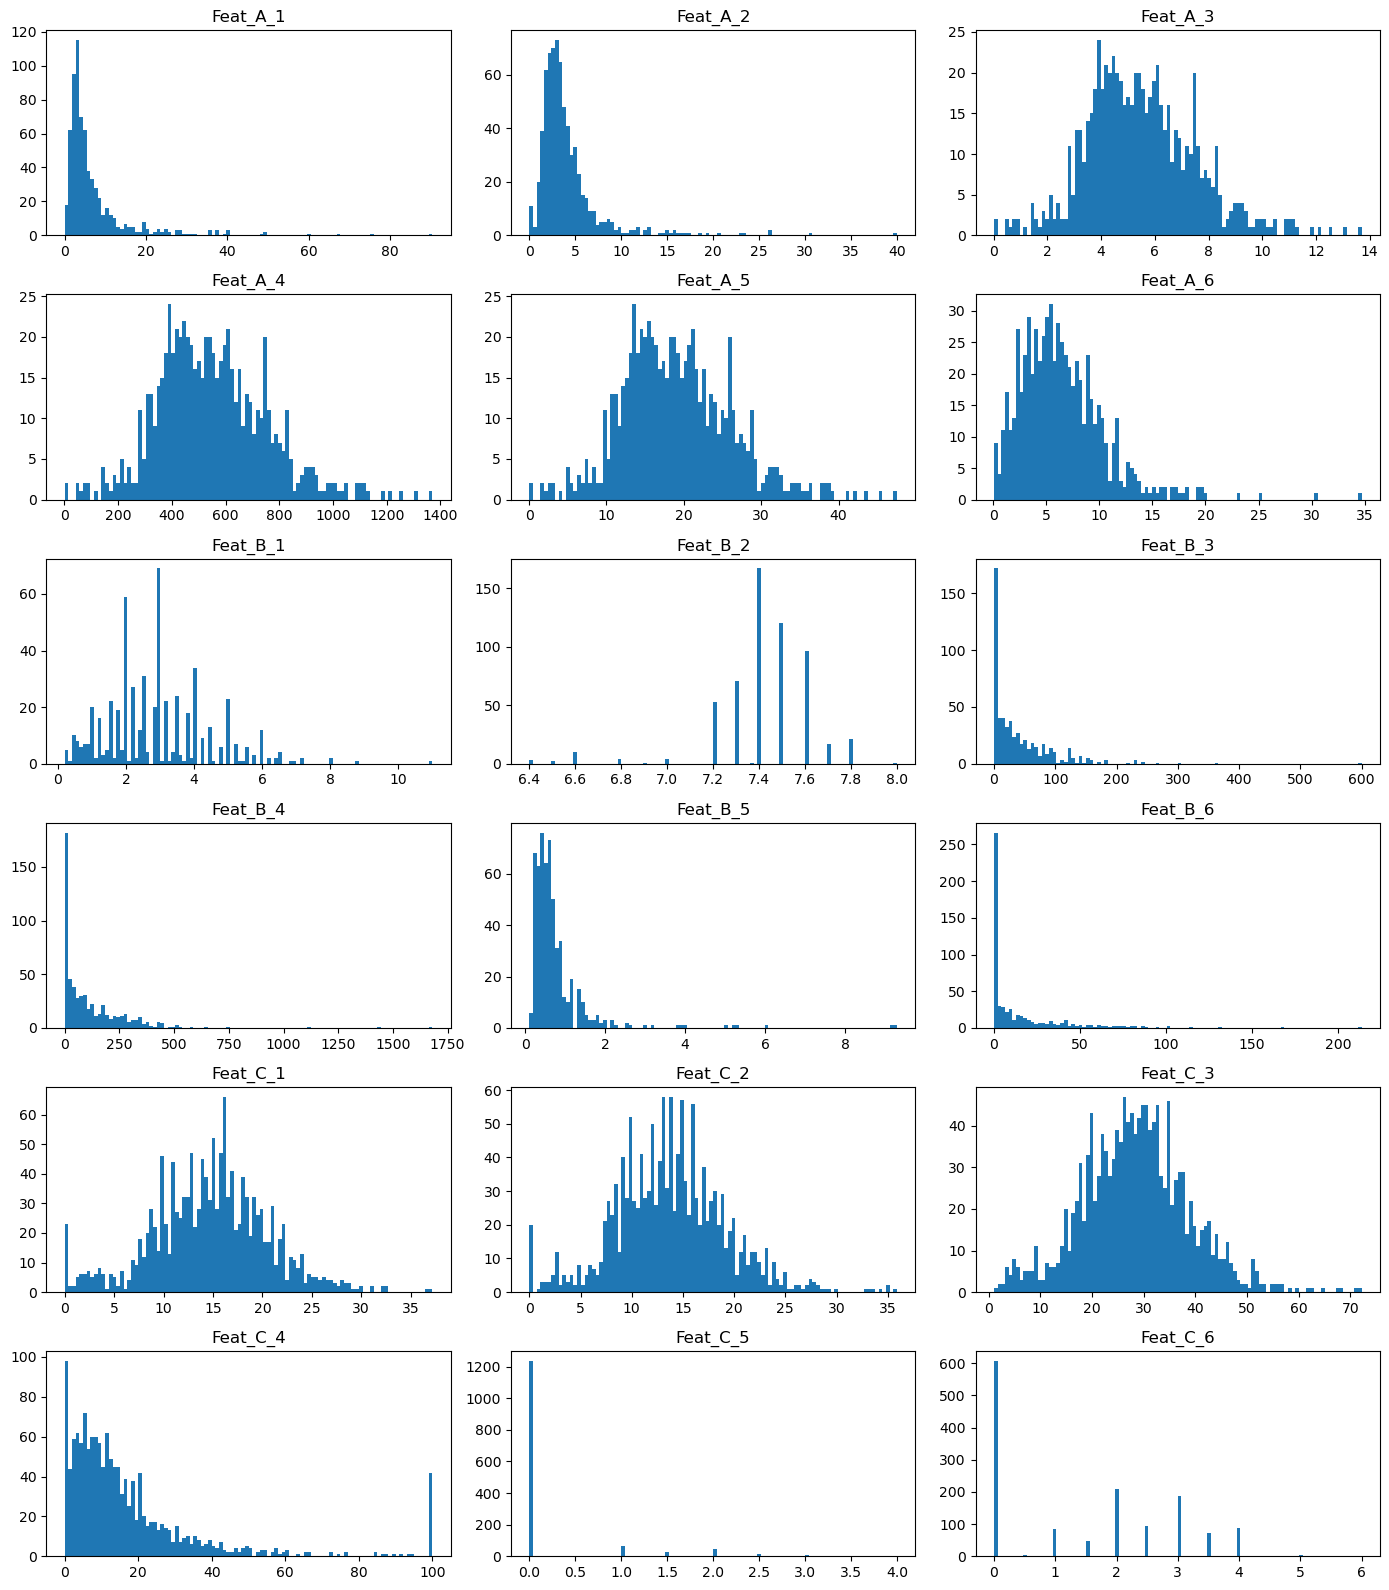

In [11]:
# Faccio una lista con delle features
features   = ['Feat_A_1', 'Feat_A_2', 'Feat_A_3', 'Feat_A_4', 'Feat_A_5', 'Feat_A_6', 
              'Feat_B_1', 'Feat_B_2', 'Feat_B_3', 'Feat_B_4', 'Feat_B_5', 'Feat_B_6', 
              'Feat_C_1', 'Feat_C_2', 'Feat_C_3', 'Feat_C_4', 'Feat_C_5', 'Feat_C_6']

# Creo una sola immagine con i subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(14, 16))
ax = ax.ravel()

# Faccio un istogramma di ogni feature
for i, feature in enumerate(features):
    ax[i].hist(df[feature], bins=100)
    ax[i].set_title(feature)

# Tolgo i plots aggiuntivi
#for i in range(len(features_with_missing), 15):
#    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

<font color=blue> 
Per riempire i valori mancanti, potrei: 

1. Riempire i valori mancanti con la media/mediana/moda dei valori presenti
    
2. Trovare la distribuzione dei valori presenti e riempire i valori mancanti seguendo la distribuzione di ogni feature. (metodi di imputation/interpolation direttamente da Pandas)
    
3. Usare metodi predittivi per riempire i valori mancanti tenendo conto anche delle correlazioni con le altre variabili (Sklearn)
    
In ogni caso i valori mancanti nelle Feat_A sono più facili da trattare perché sembrano seguire una distribuzione continua, con pochi outliers (3,4,5,6) oppure con outliers che sembrerebbe che seguono la coda della distribuzione
    
Mentre le Feat_B sono più complesse da trattare:

* Feat_B_1 sembra avere valori discreti che seguono una certa distribuzione, con dei picchi molto strani
    
* Feat_B_2 sempre a valori discreti, ma segue una distribuzone più logica
    
* Feat_B_3, Feat_B_4 e Feat_B_6 hanno tanti zeri, sono concentrati su un piccolo intervallo, ed outliers molto estremi
 
* Feat_B_5 segue una distribuzione quasi continua
    
Per quanto riguarda la variabile Target_1 non posso fare nessuna interpolazione dato che è un label del problema. Posso però fare un unsupervsed clustering e vedere se i dati si distribuiscono in corrispondenza con i label che ho a disposizione. Ma lo farò nell'ultimo punto del notebook
    
Proverò a fare un KNNImputer, per riempire i valori mancanti, tenendo conto delle altre colonne
    
IPOTESI IMPORTANTE: Nel riempire i valori mancanti, faccio l'assunzione che il fatto stesso di essere mancante sia scollegato di significato molto discutibile come ipotesi, visto che mancano lo stesso numero di valori per tante features, ma lo faccio solo per semplificare il problema. Potrebbe essere che i dati non ci sono nel dataset per una ragione precisa, e fare una interpolazione di questo genere può adirittura togliere 'informazione' al dataset

In [12]:
# Per prima faccio un dataset con le sole features
df_features = pd.DataFrame(df,columns=features)

# Inizializo un knn imputer
impute_knn = KNNImputer(n_neighbors=3)

# Creo un dataset dove calcolo i valori mancanti nel dataset di sole features
df_features2 = pd.DataFrame(impute_knn.fit_transform(df_features),columns=features)

# Ora devo aggiornare il df originale
df.update(df_features2)

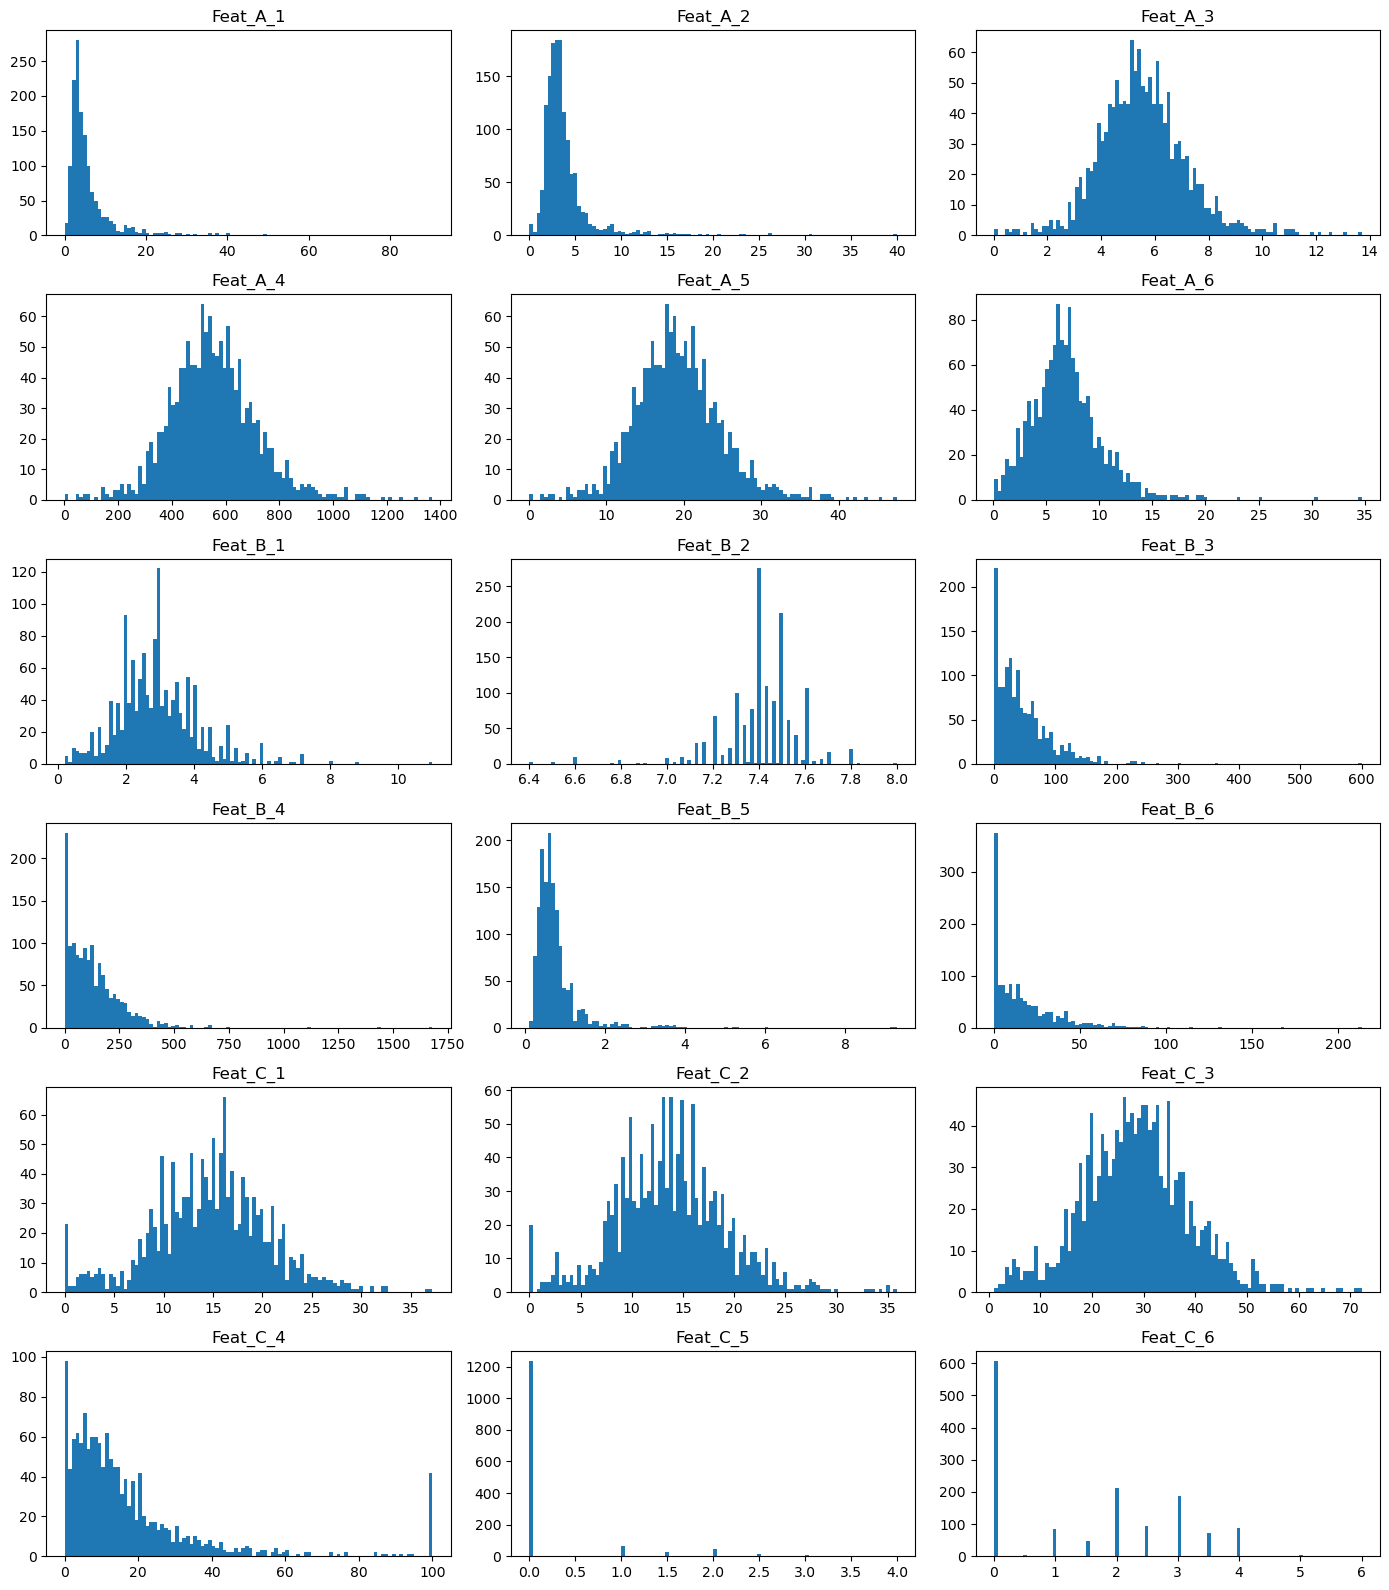

In [13]:
# Controllo le nuove distribuzioni dei dati, per vedere che rispecchino le originali

# Creo una sola immagine con i subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(14, 16))
ax = ax.ravel()

# Faccio un istogramma di ogni feature
for i, feature in enumerate(features):
    ax[i].hist(df_features2[feature], bins=100)
    ax[i].set_title(feature)



plt.tight_layout()
plt.show()

<font color=blue> Come ultime considerazioni posso dire che ho assunto che le colonne età, cap e le date non fossero collegate alle features
  
<font color=blue> Ho fatto diversi tentativi usando diversi n_neighbors, ma ne sofrivano particolarmente le distribuzioni delle variabili 'discrete' Feat_B_1 e Feat_B_2

<font color=blue> Ripeto: ho assunto che la mancanza di dati fosse completamente priva di significato 'fisico'

4. Data cleaning task: convertire la colonna `ID` nel tipo 'object'.

In [14]:
df['ID'] = df['ID'].astype(object)
df['ID']

0          0
1          1
2          2
3          3
4          4
        ... 
1395    1395
1396    1396
1397    1397
1398    1398
1399    1399
Name: ID, Length: 1400, dtype: object

5. Data cleaning task: valori errati<br>
Verificare la correttezza della colonna `CAP`. In particolare, per ogni valore, assicurarsi che:
- il numero di cifre sia uguale a 5 (aggiungere e/o rimuovere un numero di zeri sufficiente, se necessario)
- eventuali altre anomalie (anche servendosi di fonti esterne)

In [15]:
# Faccio delle boolean mask per vedere quanti CAP ci sono con 2, 3, 4 e 5 cifre
bool_cap1=(df['CAP']>=10)&(df['CAP']<100)
bool_cap2=(df['CAP']>=100)&(df['CAP']<1000)
bool_cap3=(df['CAP']>=1000)&(df['CAP']<10000)
bool_cap4=(df['CAP']>=10000)&(df['CAP']<100000)

print(f"Numero di oggetti con un CAP di 2 cifre: {bool_cap1.sum()}")
print(f"Numero di oggetti con un CAP di 3 cifre: {bool_cap2.sum()}")
print(f"Numero di oggetti con un CAP di 4 cifre: {bool_cap3.sum()}")
print(f"Numero di oggetti con un CAP di 5 cifre: {bool_cap4.sum()}")
print()
print(f"Minimo: {df['CAP'].min()} e Massimo: {df['CAP'].max()}")
print(f"Valori mancanti: {df['CAP'].isna().sum()}")

Numero di oggetti con un CAP di 2 cifre: 152
Numero di oggetti con un CAP di 3 cifre: 338
Numero di oggetti con un CAP di 4 cifre: 70
Numero di oggetti con un CAP di 5 cifre: 13

Minimo: 10.0 e Massimo: 97100.0
Valori mancanti: 827


In [16]:
# Prima converto tutti i valori mancanti in zero
df['CAP'].fillna('00000', inplace=True)

# Poi aggiungo i zeri dove c'è bisogno
df["CAP"] = df["CAP"].astype(int).astype(str).apply(lambda x: x.zfill(5))

# Visualizzo il risultato
df['CAP']

0       00012
1       00000
2       00149
3       00144
4       00000
        ...  
1395    00173
1396    00154
1397    00012
1398    00171
1399    00019
Name: CAP, Length: 1400, dtype: object

<font color=blue> ps. riguardo 'eventuali altre anomalie' posso dire che se apro il file di dati con un altro programma (sublime, numbers, ecc) vedo che sulla colonna CAP ci sono dei valori di testo 'NA', ma sul dataset letto da Pandas questi valori sono catalogati automaticamente come NaN... quindi per i nostri scopi, credo siamo a posto...

5. Data cleaning task: date
- convertire le due colonne di date in `datetime.date`. Si sommi la costante `-12219379200` alla data originale, utilizzando come unità il secondo.
- creare due nuove colonne che riportano l'anno estrapolato da ciascuna data. 

In [17]:
"""ATTENZIONE: Il 'if' vuole evitare di compilare la stessa operazione diverse volte
   perché se si compla di nuovo questa cella da un errore al sotrarre un scalare ad una data"""

if df['Data_evento_1'].dtype == np.float64:
    # Sotrarre la quantità 12219379200 ai valori presenti e fare la conversiona a datetime
    data_1 = pd.to_datetime(df["Data_evento_1"][~df["Data_evento_1"].isna()]-12219379200,unit='s')
    data_2 = pd.to_datetime(df["Data_evento_2"][~df["Data_evento_2"].isna()]-12219379200,unit='s')

    # Aggiorna le colonne 'Data_evento_1
    df['Data_evento_1'] = data_1
    df['Data_evento_2'] = data_2

    # Aggiungere le due colonne anno
    df['Anno_evento_1'] = data_1.dt.year
    df['Anno_evento_2'] = data_2.dt.year
    

    # ALTERNATIVA: prima sostituire i valori vuoti per una data_0, ma genera un bias nei modelli!!!
    #df["Data_evento_1"].fillna(12219379200)
    #data_1 = pd.to_datetime(df["Data_evento_1"]-12219379200,unit='s')

In [18]:
# Mi piaceva l'idea di trasformare la colonna anno in integer, ma 
#df['Anno_evento_1'][~df["Anno_evento_1"].isna()].astype(int)

# Controllo per vedere la nuova forma del DataFrame
df

,ID,CAP,Età,Data_evento_1,Feat_A_1,Feat_A_2,Feat_A_3,Feat_A_4,Feat_A_5,Feat_A_6,Data_evento_2,Feat_B_1,Feat_B_2,Feat_B_3,Feat_B_4,Feat_B_5,Feat_B_6,Target_1,Feat_C_1,Feat_C_2,Feat_C_3,Feat_C_4,Feat_C_6,Feat_C_5,Target_2,Anno_evento_1,Anno_evento_2
0,0,00012,30.0,2007-04-13,7.420000,3.570000,10.840000,1084.000000,37.614800,10.536359,2007-04-13,3.633333,7.400000,42.166667,141.666667,0.433333,20.195,NaN,21.4,17.3,38.7,19.158879,1.0,0.0,0.0,2007.0,2007.0
1,1,00000,30.0,2009-11-13,14.903333,4.826667,4.433333,443.333333,15.383667,3.522888,NaT,7.166667,7.566667,21.733333,87.100000,0.866667,13.260,NaN,0.0,10.5,10.5,100.000000,0.0,0.0,0.0,2009.0,NaN
2,2,00149,50.0,2013-12-13,60.060000,23.380000,2.140000,214.000000,7.425800,0.317613,2013-09-23,2.766667,7.333333,6.666667,30.000000,0.466667,1.350,NaN,1.3,1.2,2.5,7.692308,0.0,0.0,1.0,2013.0,2013.0
3,3,00144,32.0,2005-06-17,23.980000,6.530000,4.290000,429.000000,14.886300,2.279678,2006-02-09,11.000000,7.500000,0.000000,0.000000,1.600000,0.000,1.0,0.0,10.5,10.5,100.000000,0.0,0.0,0.0,2005.0,2006.0
4,4,00000,37.0,2009-03-27,6.743333,2.560000,3.393333,339.333333,11.774867,5.610973,NaT,1.600000,7.333333,18.000000,33.200000,0.466667,4.528,NaN,14.8,0.0,14.8,100.000000,0.0,0.0,0.0,2009.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,00173,20.0,2013-05-03,10.810000,4.720000,5.140000,514.000000,17.835800,3.778771,2012-10-18,2.000000,7.300000,0.700000,1.400000,0.900000,0.000,0.0,7.4,7.8,15.2,5.128205,3.0,0.0,0.0,2013.0,2012.0
1396,1396,00154,NaN,2011-12-21,4.490000,2.670000,5.170000,517.000000,17.939900,6.719064,2011-12-21,2.800000,7.300000,90.000000,252.000000,0.400000,36.036,0.0,23.1,23.6,46.7,2.118644,3.0,0.0,0.0,2011.0,2011.0
1397,1397,00012,32.0,2009-11-26,2.670000,2.840000,3.950000,395.000000,13.706500,4.826232,2009-11-26,1.750000,7.133333,45.000000,107.500000,0.866667,13.625,NaN,13.2,12.8,26.0,3.030303,2.0,0.0,0.0,2009.0,2009.0
1398,1398,00171,22.0,2013-06-14,1.380000,4.050000,10.440000,1044.000000,36.226800,8.944889,2013-06-14,3.000000,7.600000,120.000000,360.000000,0.400000,28.080,0.0,21.8,19.3,41.1,11.467890,3.0,0.0,0.0,2013.0,2013.0


6. Visualizzare la distribuzione di ogni feature del dataset.

<font color=blue> Siccome ho già controllato le distribuzioni, aggiungo qua un corner-plot per cominciare ad analizzare non solo le distribuzioni, ma anche le correlazioni tra le variabili. Per non fare un mega-corner di 18x18, faccio tre plot con le features divise in _A, _B e _C

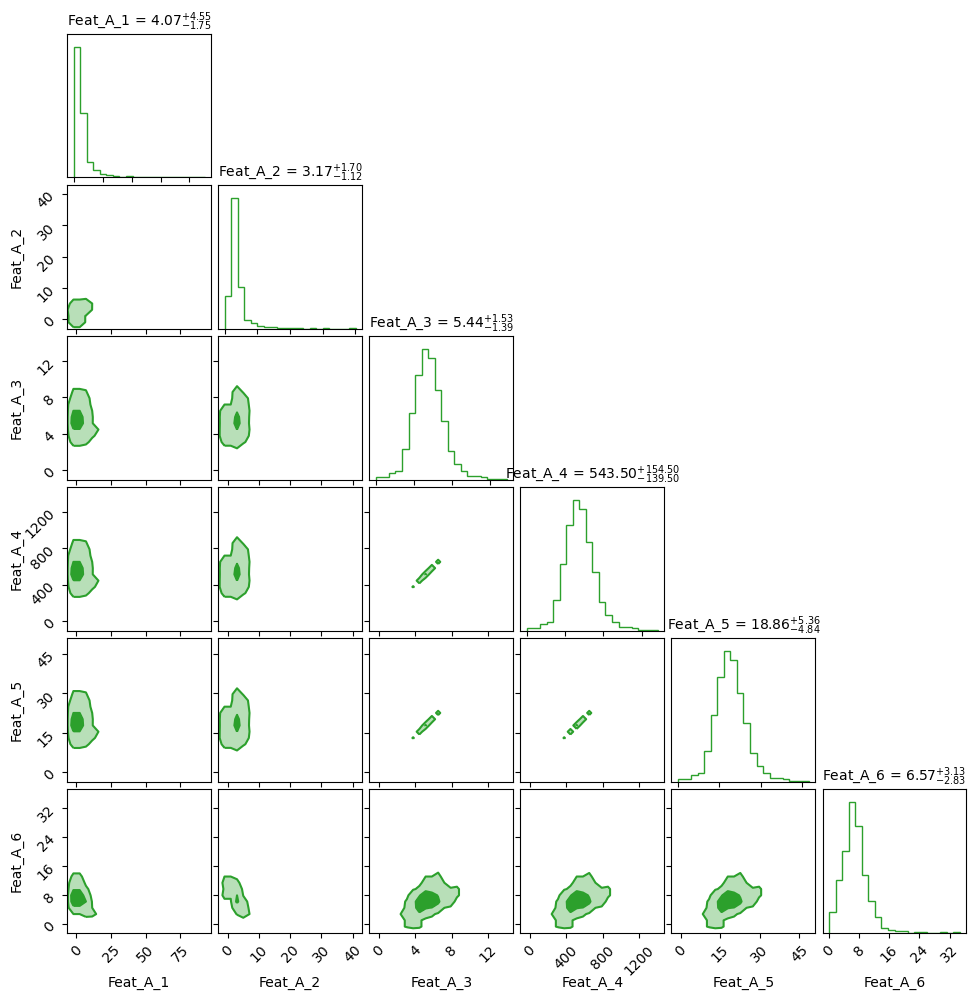

In [19]:
# Per fare i plot con corner
feat_A   = ['Feat_A_1', 'Feat_A_2', 'Feat_A_3', 'Feat_A_4', 'Feat_A_5', 'Feat_A_6'] 
feat_B   = ['Feat_B_1', 'Feat_B_2', 'Feat_B_3', 'Feat_B_4', 'Feat_B_5', 'Feat_B_6'] 
feat_C   = ['Feat_C_1', 'Feat_C_2', 'Feat_C_3', 'Feat_C_4', 'Feat_C_5', 'Feat_C_6']

# Per fare i plot con paiplot
featA_targ   = ['Feat_A_1', 'Feat_A_2', 'Feat_A_3', 'Feat_A_4', 'Feat_A_5', 'Feat_A_6', 'Target_1','Target_2']
featB_targ   = ['Feat_B_1', 'Feat_B_2', 'Feat_B_3', 'Feat_B_4', 'Feat_B_5', 'Feat_B_6', 'Target_1','Target_2']
featC_targ   = ['Feat_C_1', 'Feat_C_2', 'Feat_C_3', 'Feat_C_4', 'Feat_C_5', 'Feat_C_6','Target_1','Target_2']

fig,axes   = plt.subplots(6,6,figsize=(10,10))
_=corner.corner(df[feat_A],levels = 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2),plot_datapoints=False,plot_density=True,plot_contours=True,fill_contours=True,show_titles=True,bins=20,fig=fig,color='tab:green',labels=feat_A,title_kwargs={"fontsize": 10})


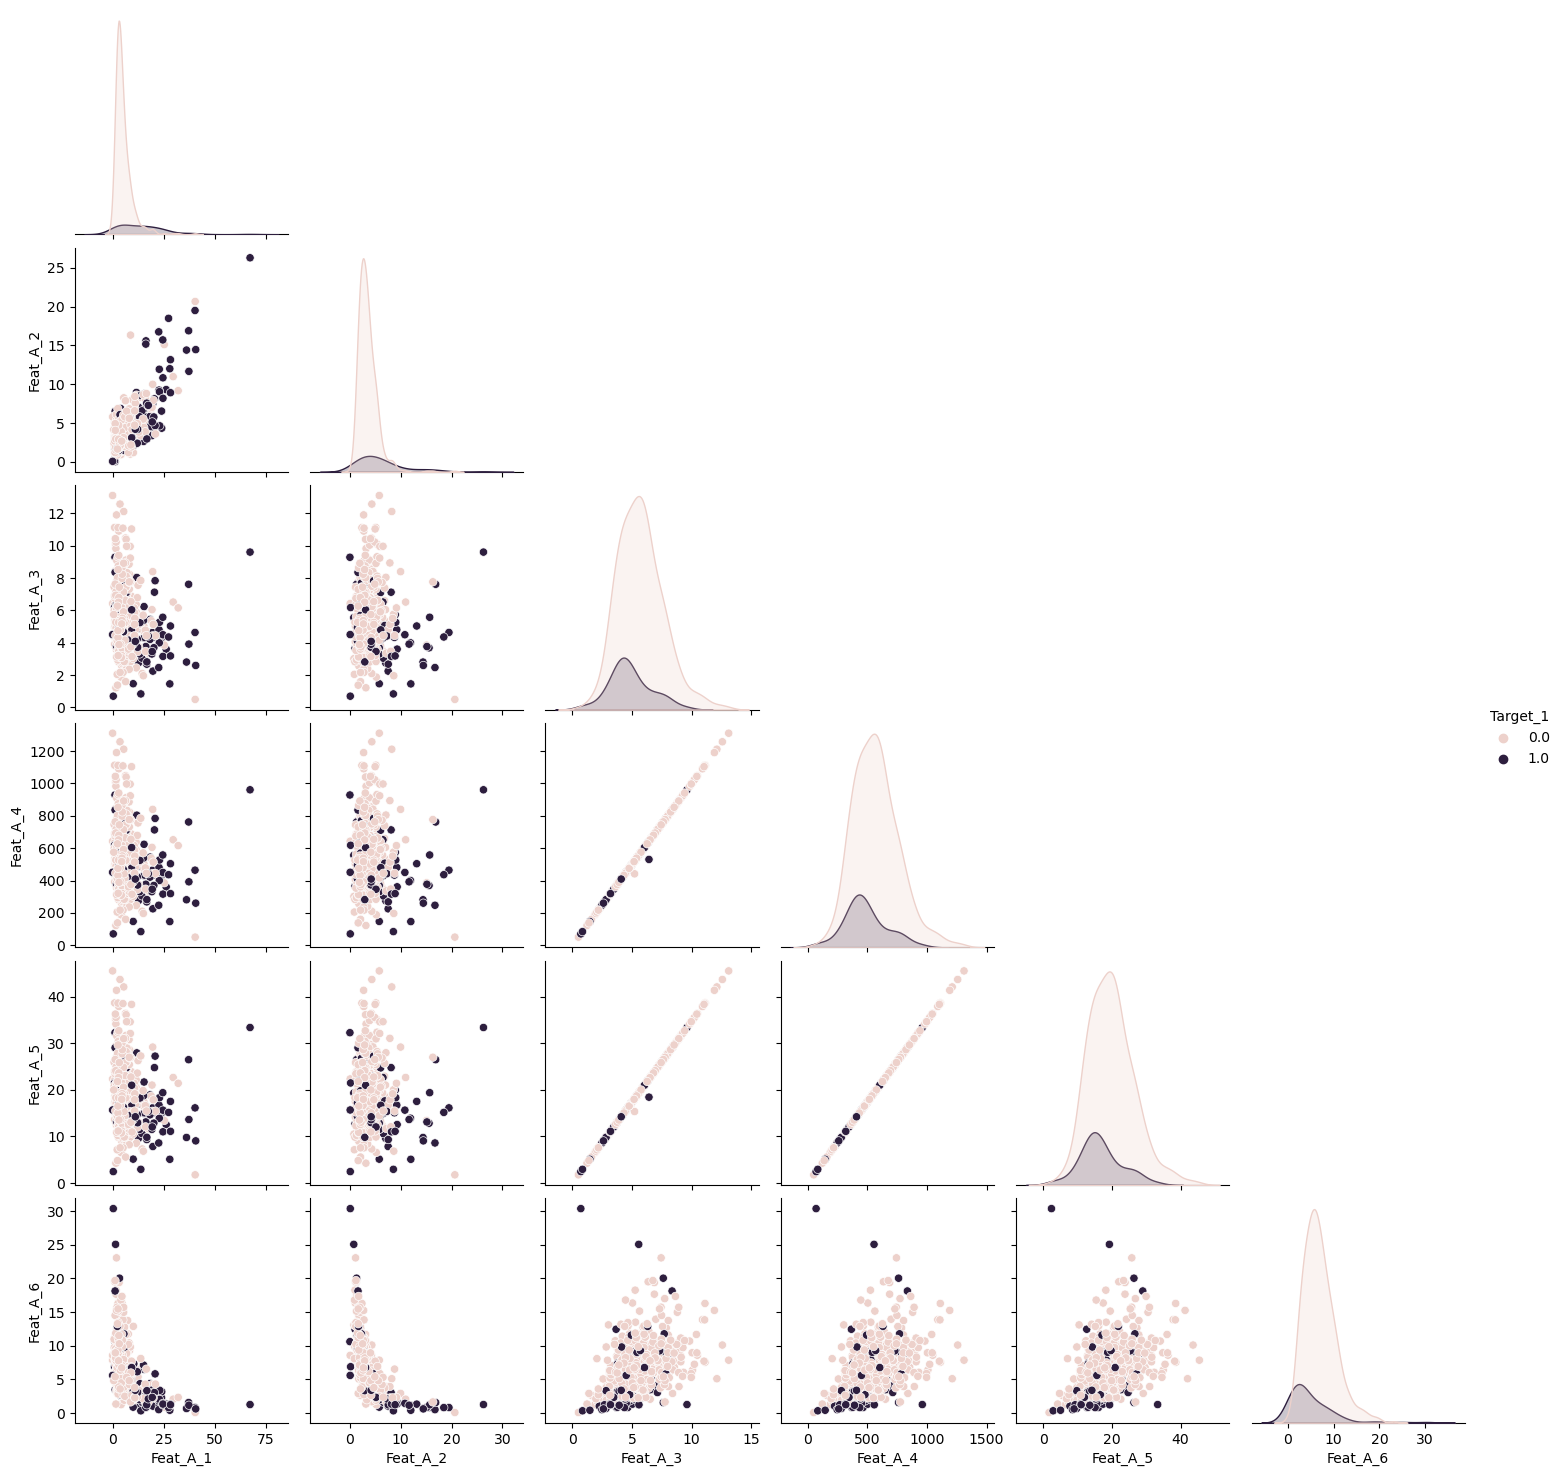

In [20]:
sns.pairplot(df[featA_targ].drop(['Target_2'],axis=1), hue='Target_1',corner=True)


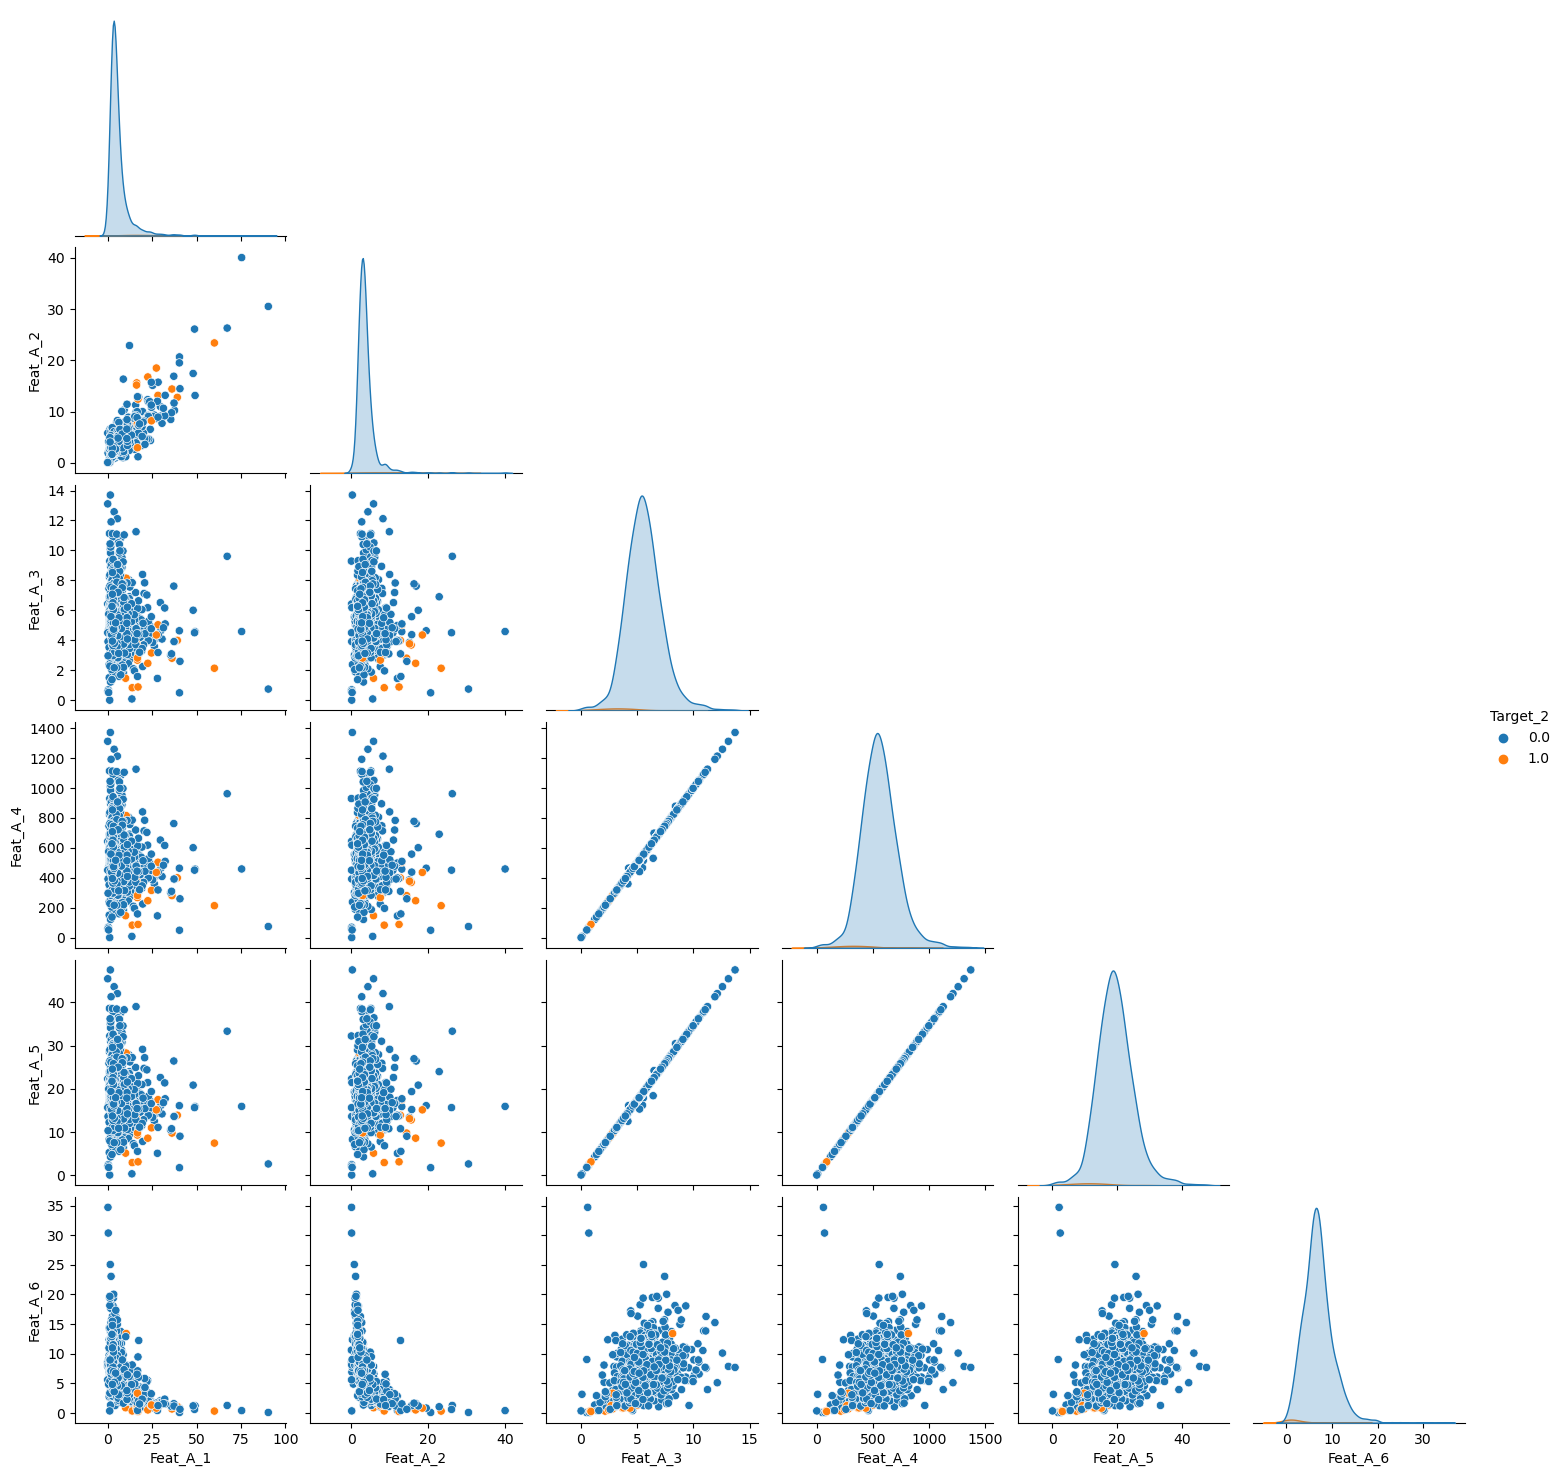

In [21]:
sns.pairplot(df[featA_targ].drop(['Target_1'],axis=1), hue='Target_2',corner=True)


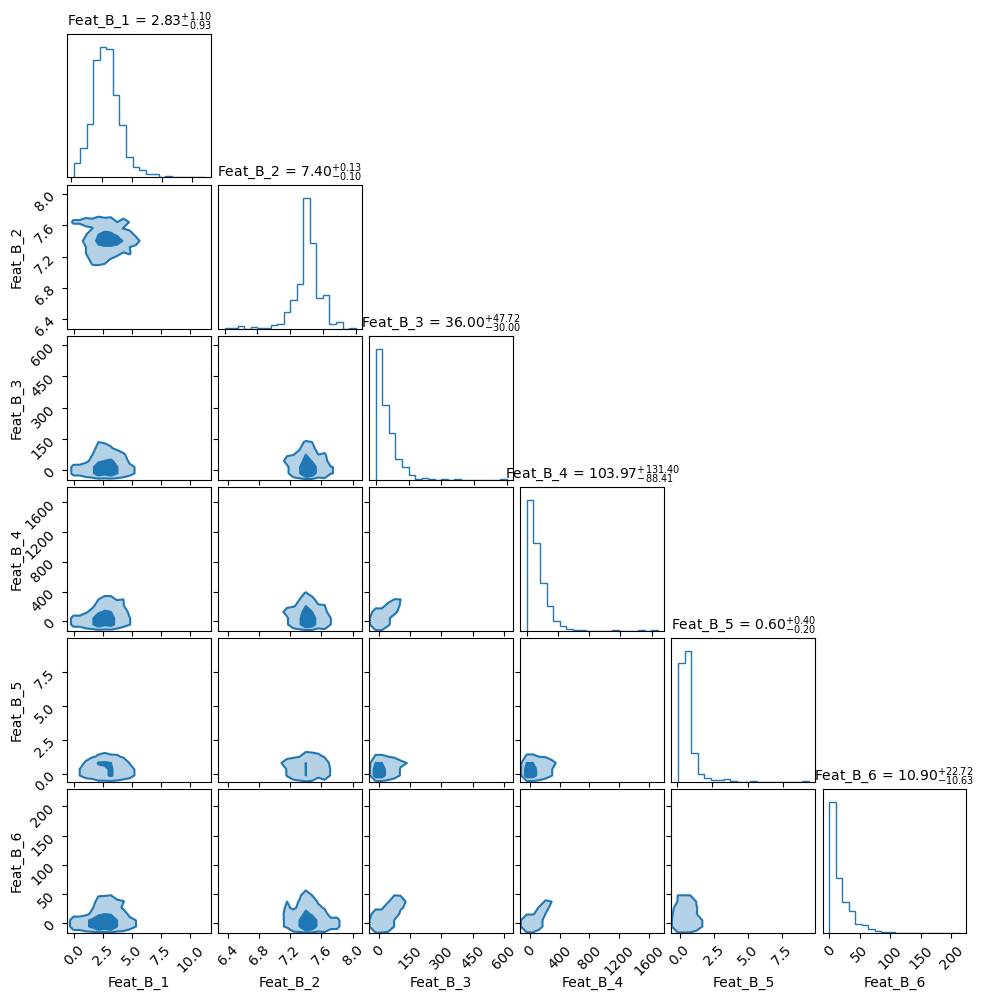

In [22]:
fig,axes   = plt.subplots(6,6,figsize=(10,10))
_=corner.corner(df[feat_B],levels = 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2),plot_datapoints=False,plot_density=True,plot_contours=True,fill_contours=True,show_titles=True,bins=20,fig=fig,color='tab:blue',labels=feat_B,title_kwargs={"fontsize": 10})


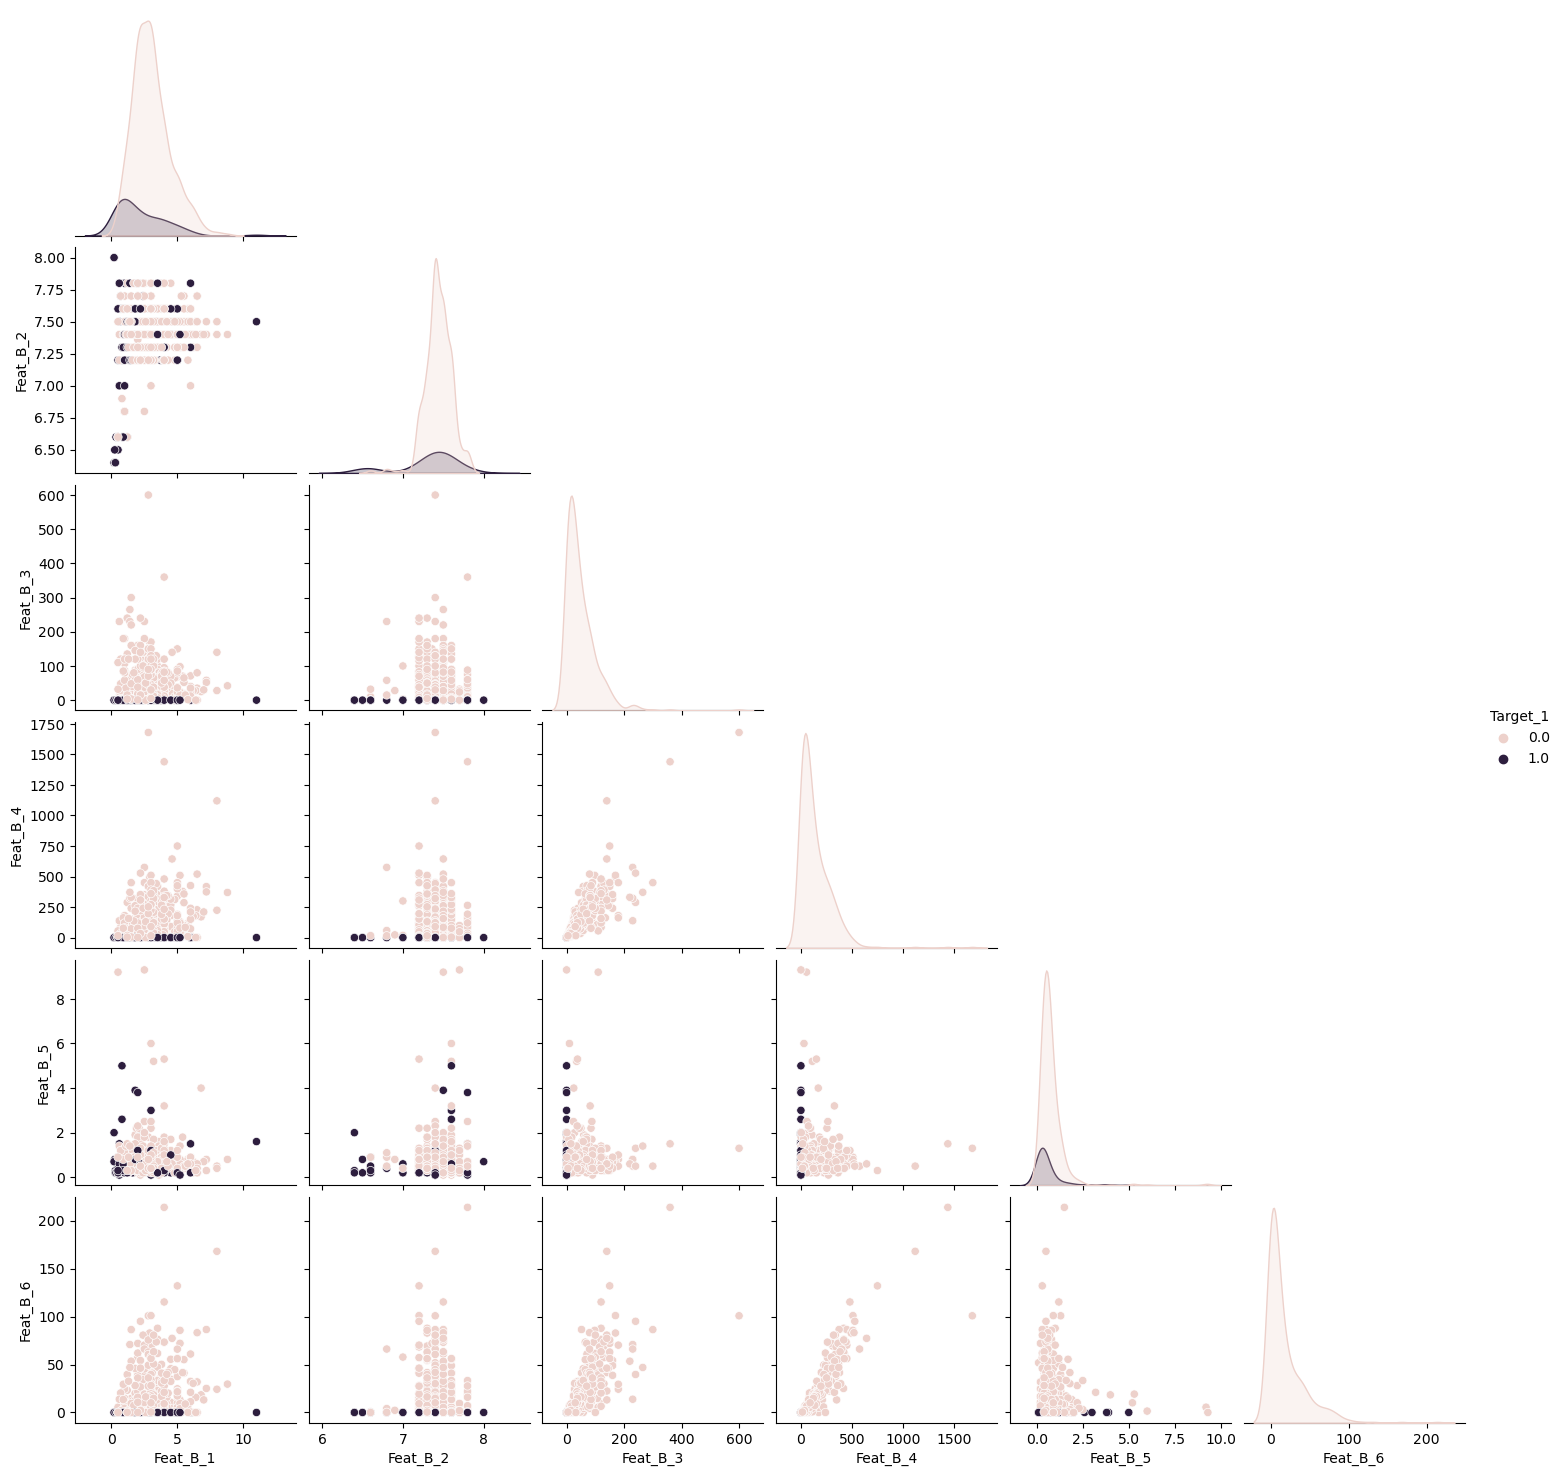

In [23]:
sns.pairplot(df[featB_targ].drop(['Target_2'],axis=1), hue='Target_1',corner=True)


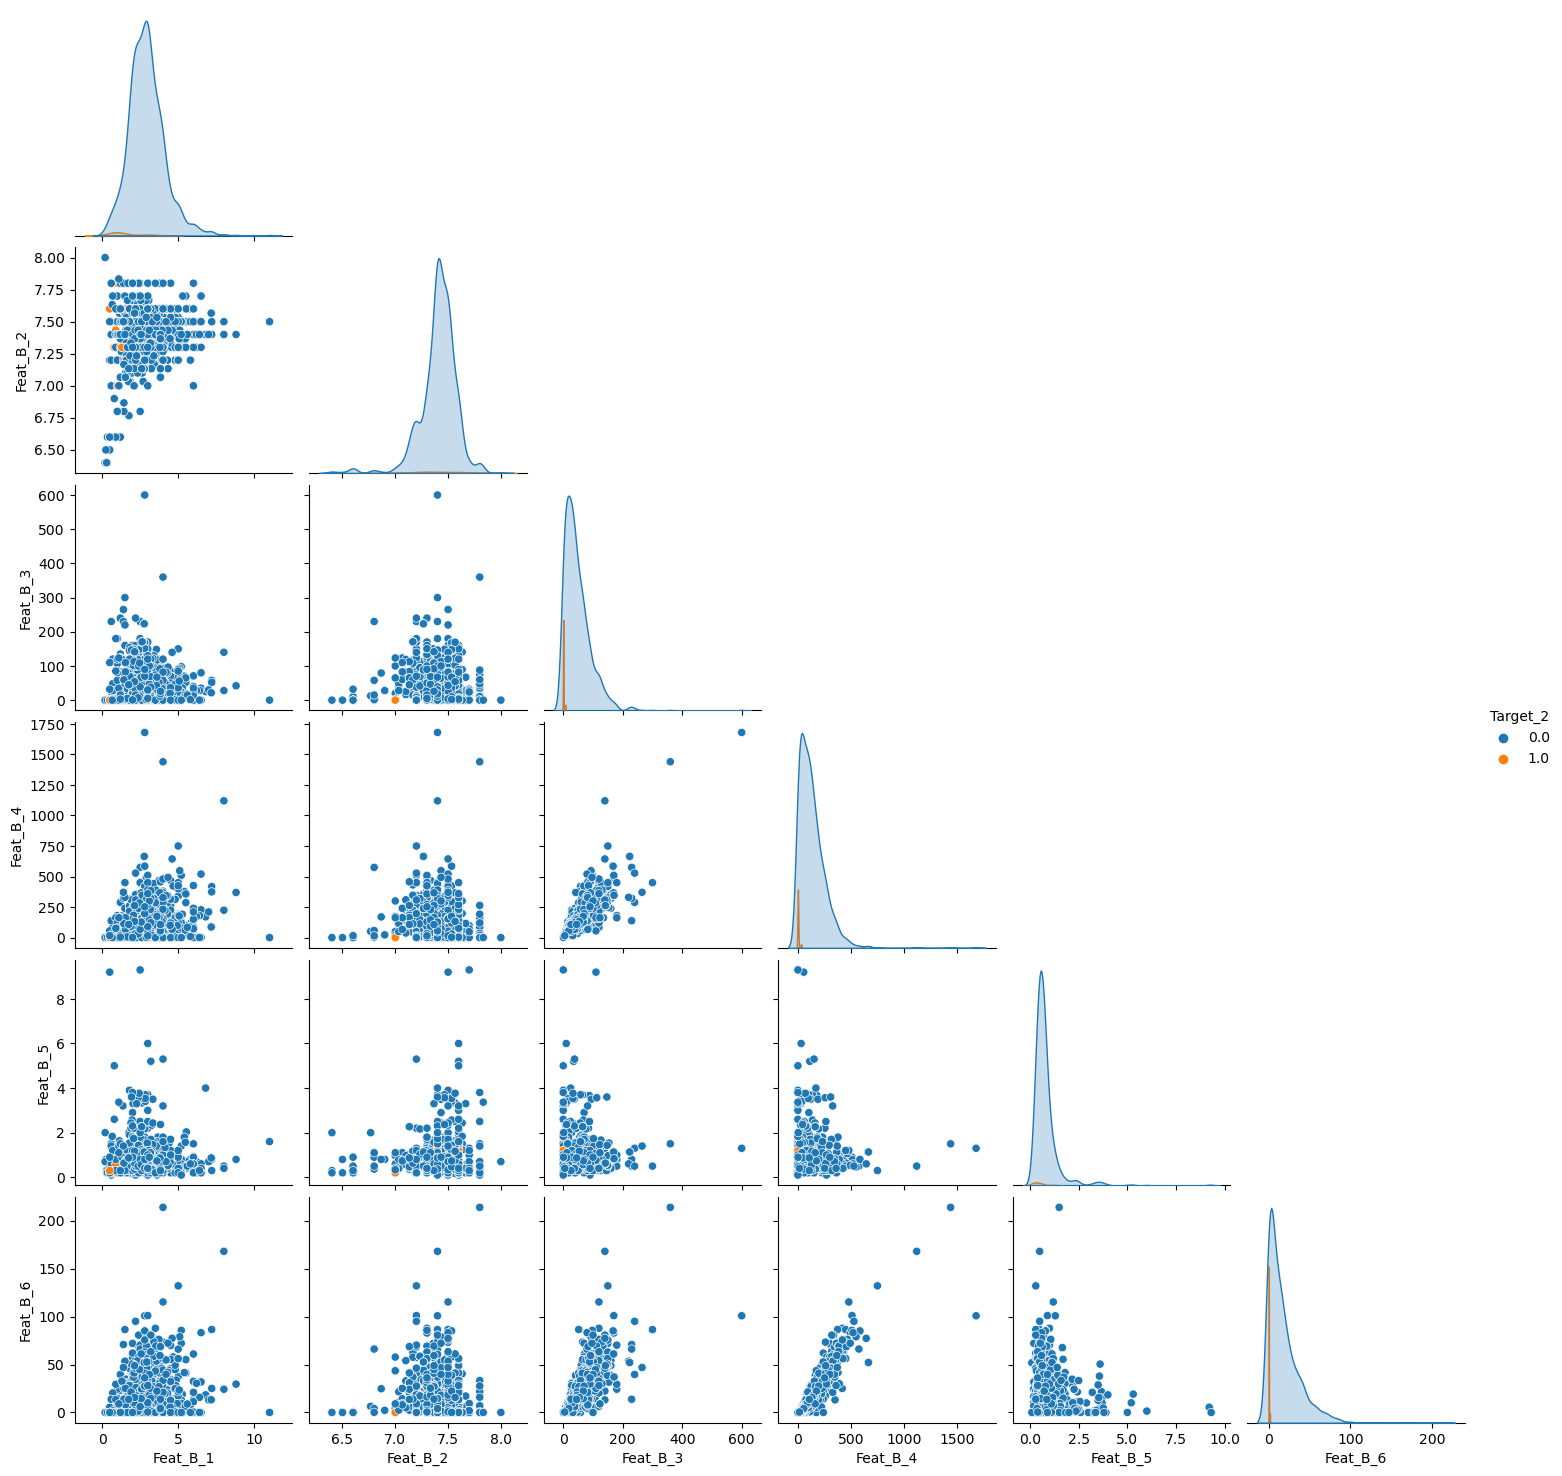

In [24]:
sns.pairplot(df[featB_targ].drop(['Target_1'],axis=1), hue='Target_2',corner=True)


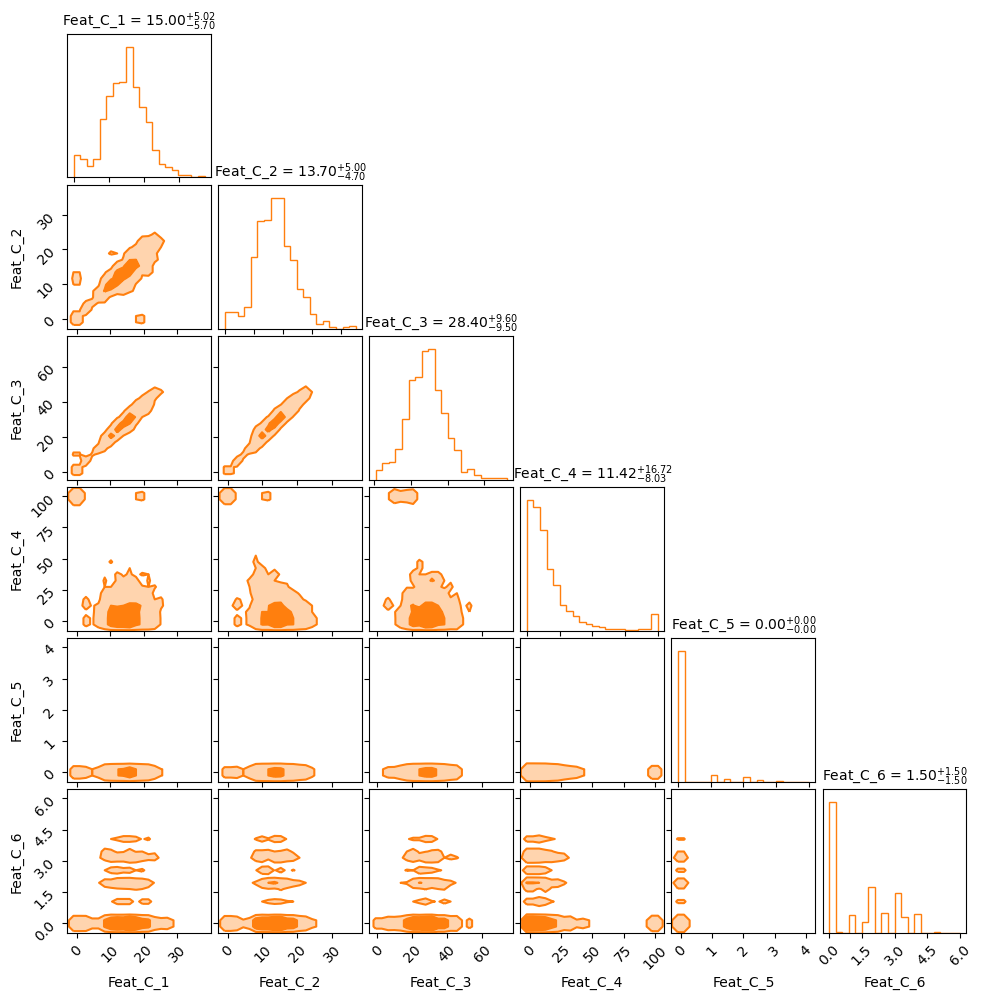

In [25]:
fig,axes   = plt.subplots(6,6,figsize=(10,10))
_=corner.corner(df[feat_C],levels = 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2),plot_datapoints=False,plot_density=True,plot_contours=True,fill_contours=True,show_titles=True,bins=20,fig=fig,color='tab:orange',labels=feat_C,title_kwargs={"fontsize": 10})


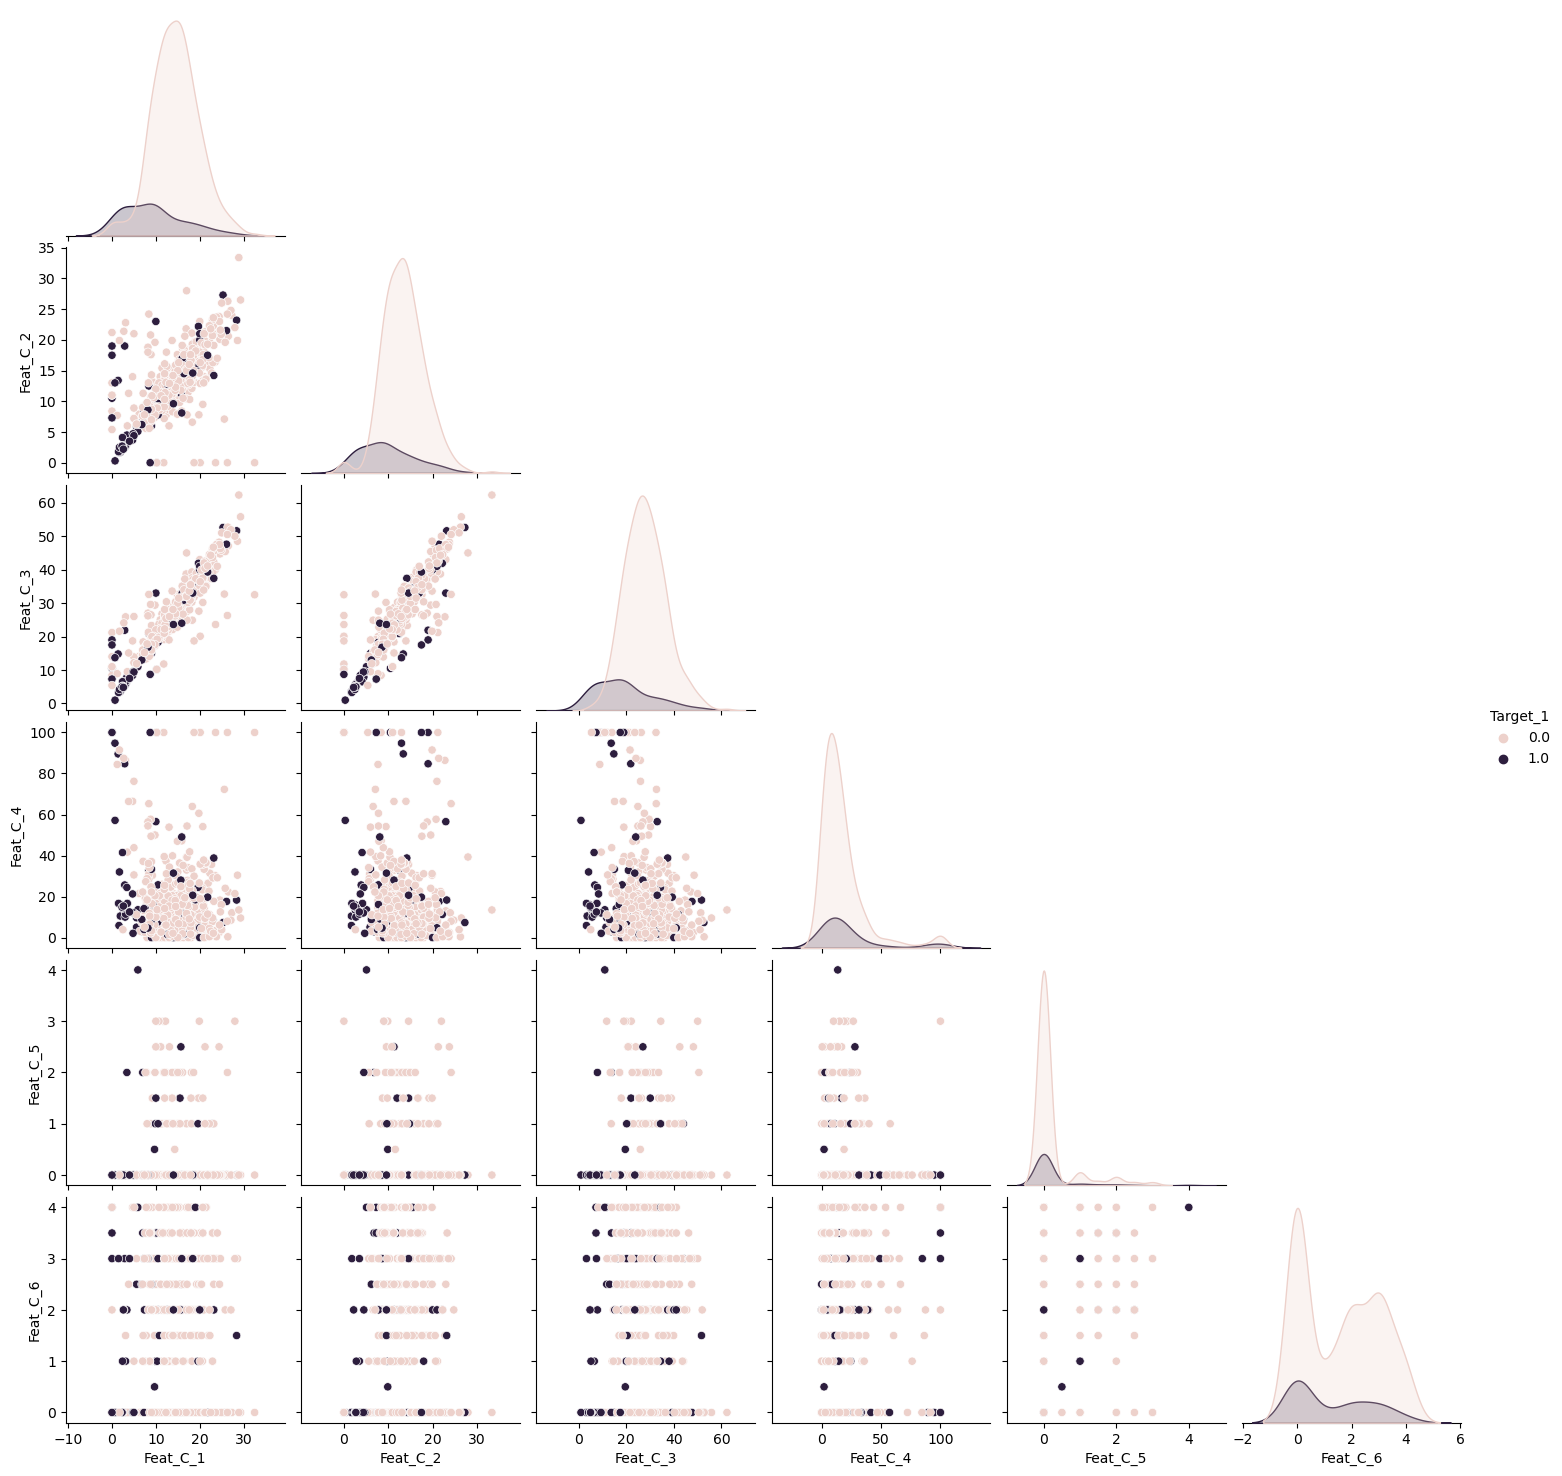

In [26]:
sns.pairplot(df[featC_targ].drop(['Target_2'],axis=1), hue='Target_1',corner=True)


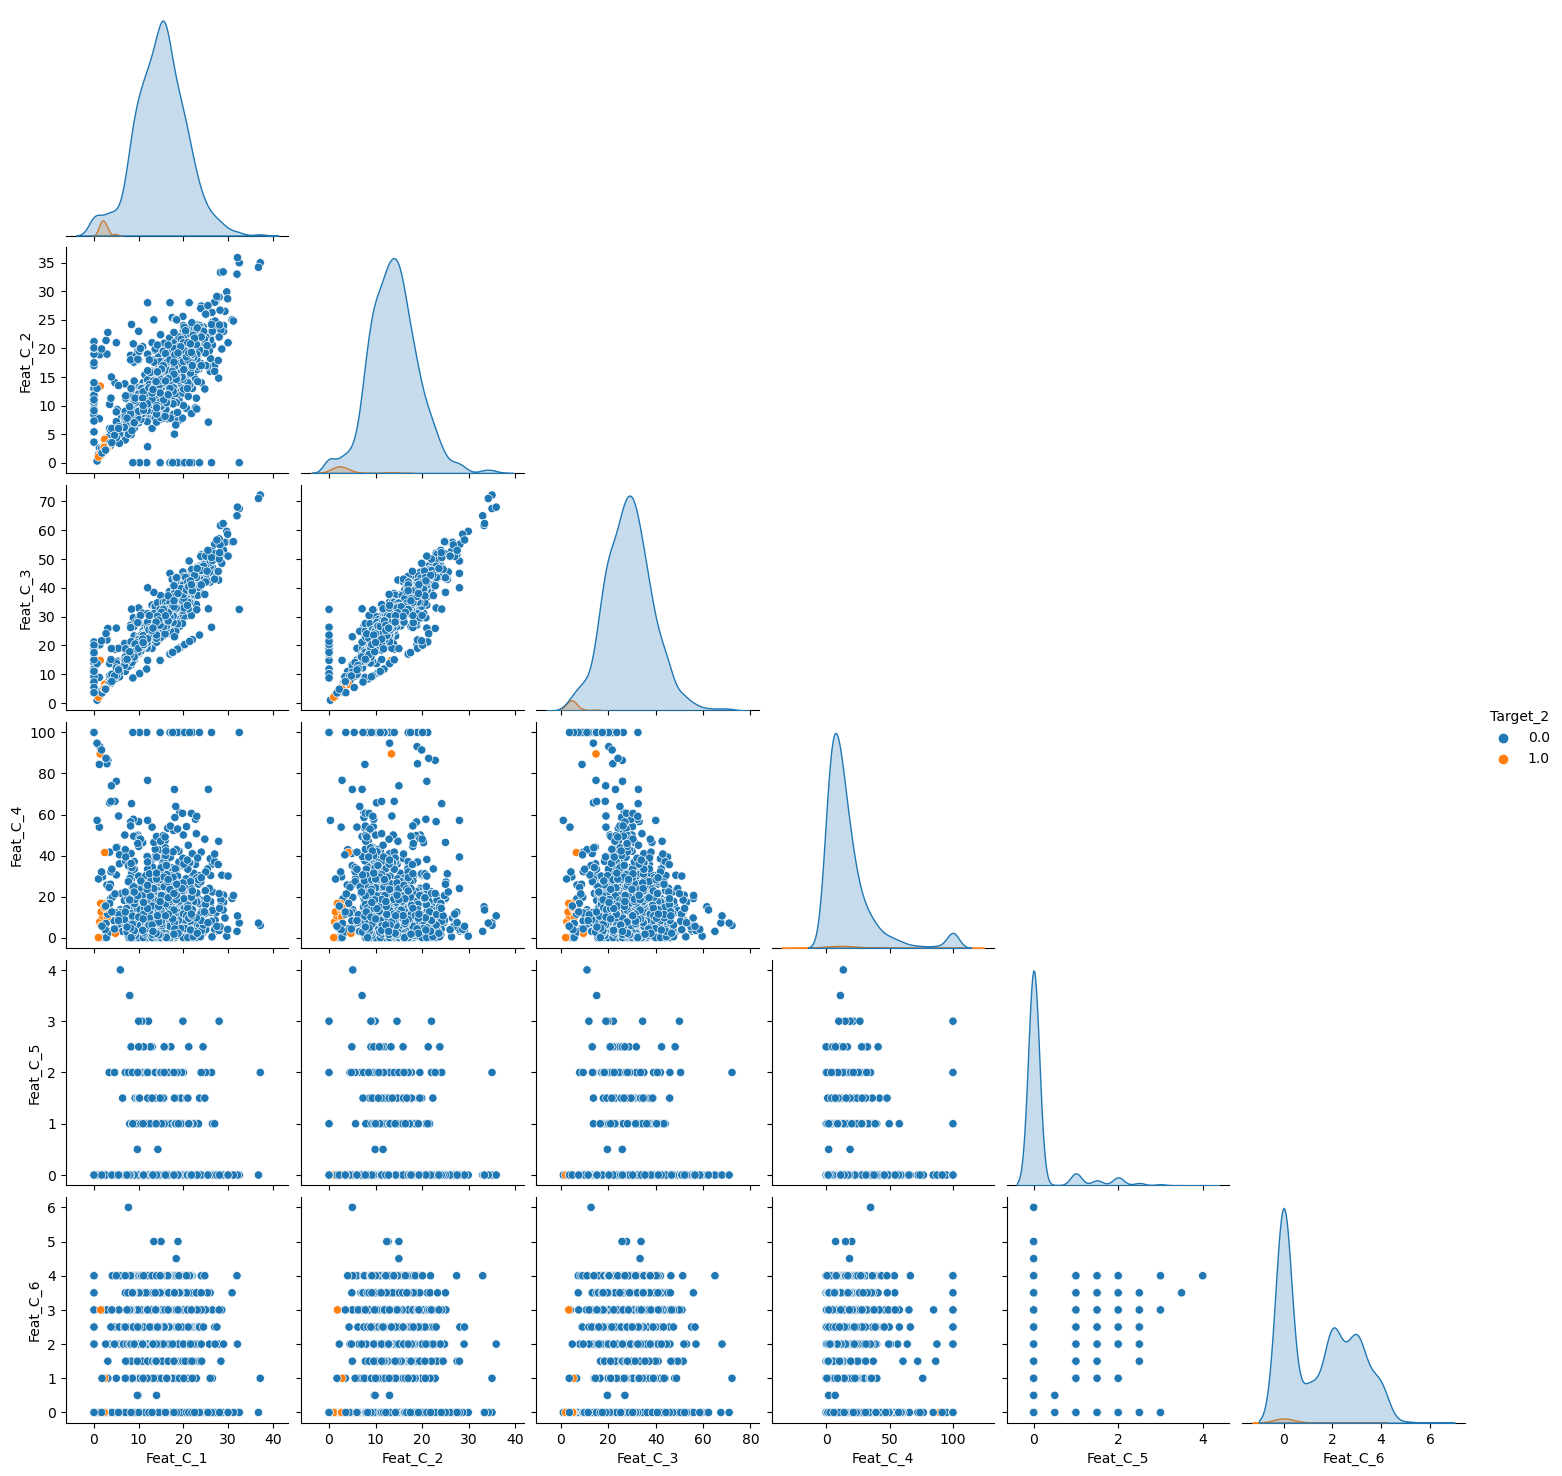

In [27]:
sns.pairplot(df[featC_targ].drop(['Target_1'],axis=1), hue='Target_2',corner=True)


<font color=blue> ai commenti precedenti, posso aggiungere che Feat_A_3, Feat_A_4 e Feat_A_5 sono correlate e rappresentano la stessa informazione, per cui si possono ridurre ad una sola feature. Stessa cosa per Feat_C_1, Feat_C_2 e Feat_C_3

7. Eseguire un test di normalità qualitativo e/o quantitativo su ogni feature.

In [28]:
for column in df[features].columns:
    stat, p = shapiro(df[column])
    print(f"{column}: Saphiro statistics = {stat}, p-value = {p}")
    if p > 0.05:
        print(f"La feature {column} può essere Gaussiana (impossibile rifiutare H0)")
    else:
        print(f"La feature {column} non può essere Gaussiana (si può rifiutare H0)")
    print()
    
    # p_value < soglia ---> ipotesi-0 rifiutata

Feat_A_1: Saphiro statistics = 0.5657310485839844, p-value = 0.0
La feature Feat_A_1 non può essere Gaussiana (si può rifiutare H0)

Feat_A_2: Saphiro statistics = 0.6120339632034302, p-value = 0.0
La feature Feat_A_2 non può essere Gaussiana (si può rifiutare H0)

Feat_A_3: Saphiro statistics = 0.9774166345596313, p-value = 5.1741908826084815e-14
La feature Feat_A_3 non può essere Gaussiana (si può rifiutare H0)

Feat_A_4: Saphiro statistics = 0.9774104952812195, p-value = 5.1476004855150956e-14
La feature Feat_A_4 non può essere Gaussiana (si può rifiutare H0)

Feat_A_5: Saphiro statistics = 0.9774104952812195, p-value = 5.1476004855150956e-14
La feature Feat_A_5 non può essere Gaussiana (si può rifiutare H0)

Feat_A_6: Saphiro statistics = 0.9321770668029785, p-value = 1.029148528597011e-24
La feature Feat_A_6 non può essere Gaussiana (si può rifiutare H0)

Feat_B_1: Saphiro statistics = 0.9567638039588928, p-value = 6.150573176706782e-20
La feature Feat_B_1 non può essere Gaussiana

8. Costruire una nuova colonna `Età_bins` a partire dalla colonna `Età` con i bin così suddivisi:<br>
`< 20`, `21-30`, `31-40`, `41-50`, `51-60`, `> 61`

In [29]:
# Faccio un array con gli intervalli che voglio
bins_età = [0,20,30,40,50,60,100]

# Creao la nuova colonna categorica
df['Età_bins'] = pd.cut(df['Età'], bins_età, labels=['<20', '21-30', '31-40', '41-50', '51-60', '>61'])


9. Creare delle visualizzazioni informative a partire dai valori riportati in `Età_bins` di diverse feature. 

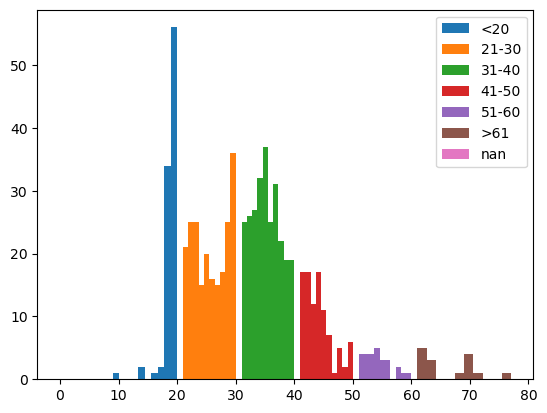

In [30]:
# Selezionare le categorie da "Età_bins"
cat_età_bins = df['Età_bins'].unique().sort_values()

# Creare un histogramma diviso per categorie
for cat in cat_età_bins:
    mask = df['Età_bins'] == cat
    plt.hist(df[mask]['Età'], bins=10, label=cat)

plt.legend()
plt.show()



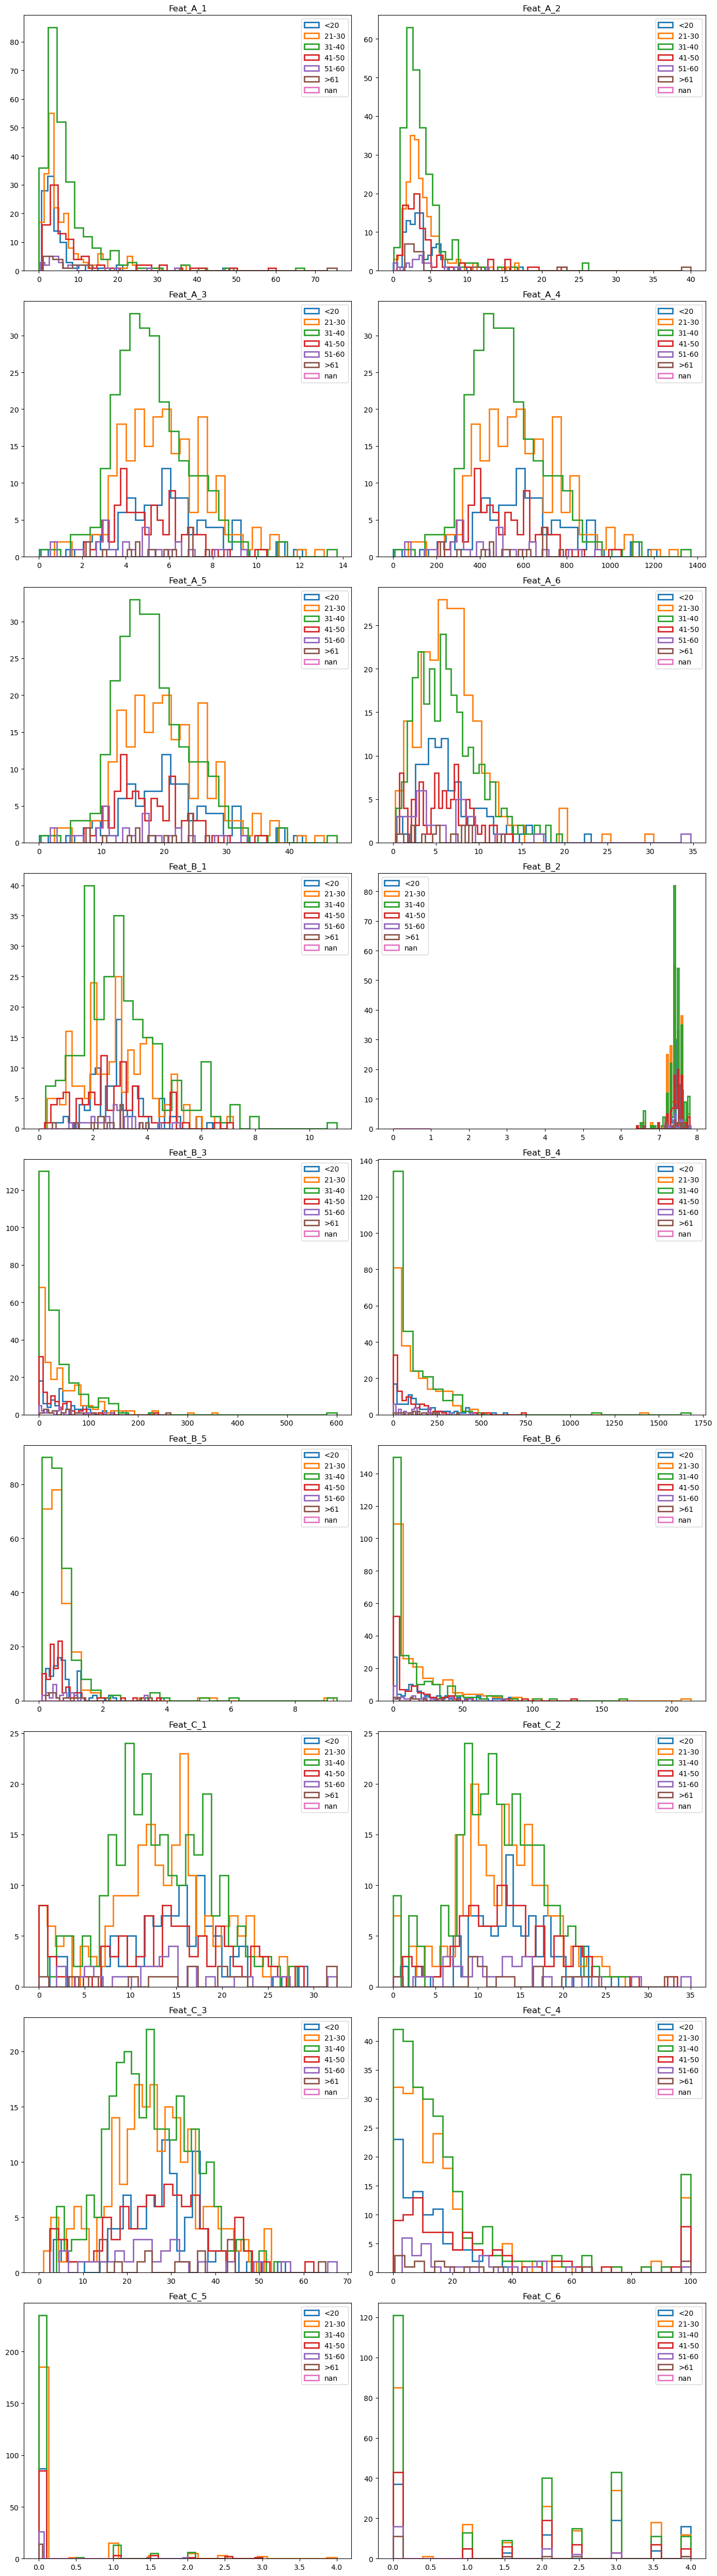

In [31]:
# Creo una sola immagine con i subplots
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(14, 50))
ax = ax.ravel()

# Faccio un istogramma di ogni feature
for i, feature in enumerate(features):
    for cat in cat_età_bins:
        mask = df['Età_bins'] == cat
        ax[i].hist(df[mask][feature], bins=30,histtype='step', linewidth=2, fill=False,label=cat)
        ax[i].set_title(feature)
        ax[i].legend()
        #ax[i].yscale('log')
        
plt.tight_layout()
plt.show()

In [32]:
_="""# scegliere due features da confrontare:
feat_confronto_eta = ['Feat_A_4','Feat_A_6']


plt.figure(figsize=(5,5))
for cat in cat_età_bins:
    mask = df['Età_bins'] == cat
    plt.scatter(df[mask][feat_confronto_eta[0]],df[mask][feat_confronto_eta[1]],label=cat,s=2)

    
plt.xlabel(feat_confronto_eta[0])
plt.ylabel(feat_confronto_eta[1])
plt.legend()
plt.show()
"""

In [123]:
# Potrebbe essere ottimizzato, per occupare meno spazio!!!
_="""for cat in cat_età_bins:
    mask = df['Età_bins'] == cat
    sns_plot = sns.pairplot(df[featC_targ][mask].drop(['Target_2'],axis=1), hue='Target_1',corner=True)
    plt.show()
"""

In [124]:
# Potrebbe essere ottimizzato, per occupare meno spazio!!!
_="""for cat in cat_età_bins:
    mask = df['Età_bins'] == cat
    sns_plot = sns.pairplot(df[featC_targ][mask].drop(['Target_1'],axis=1), hue='Target_2',corner=True)
    plt.show()
"""

10. Studiare la correlazione tra le feature numeriche, servendosi di una heatmap per la visualizzazione. Se possibile, riportare nel grafico l'entità della correlazione osservata, sulla base del valore (assoluto) assunto dal coefficiente di correlazione (Weak: 0.25-0.50, Medium: 0.50-0.75, Strong: 0.75-1.00).

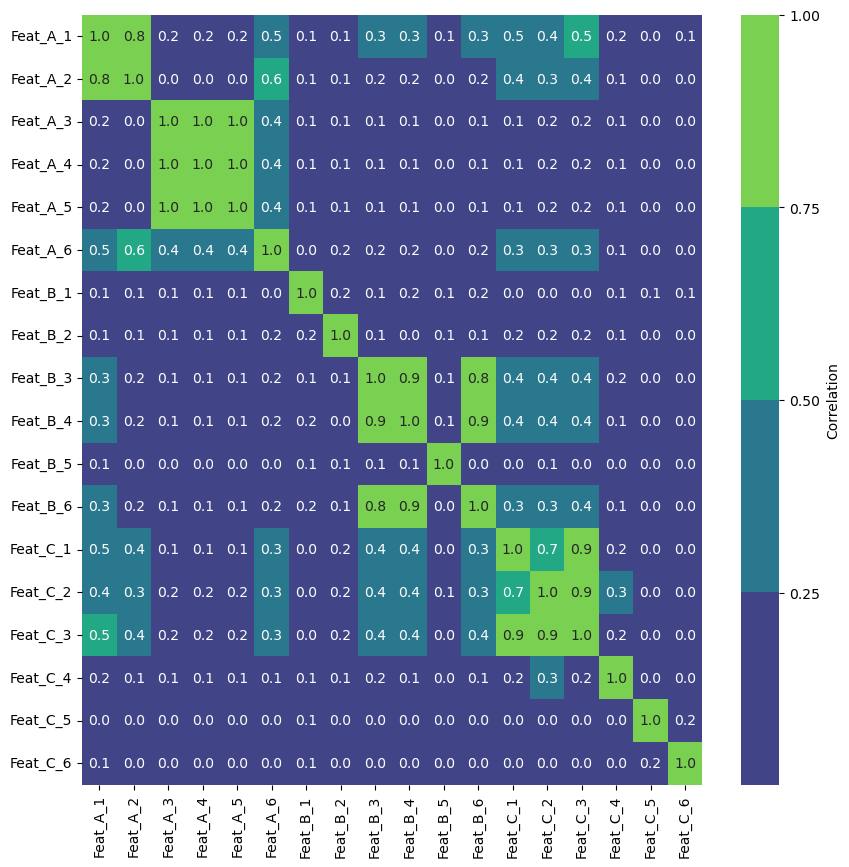

In [35]:
# Creo una palette di 4 colori per gli intervalli che voglio
cmap_intervals = sns.color_palette("viridis",n_colors=4)

# calcolare la correlation matrix
corr = np.abs(df[features].corr())

# visualizzare i risultati
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap=cmap_intervals, cbar_kws={'ticks': [0, 0.25, 0.50, 0.75, 1.00],'label':'Correlation'})
plt.show()

11. Costruire, addestrare e valutare un modello a propria scelta che sia in grado di predire il Target_1 e/o il Target_2 (classificazione binaria).

<font color=blue> Per quanto riguarda Target_1, essendoci tanti samples senza label, ci sarebbero due opzioni: o creo una terza classe e faccio una classificazione multiclasse, oppure tolgo dal dataset i valori dove Target_1 è NaN e faccio una classificazione binaria
    
    
<font color=blue>     Per quanto riguarda Target_2, proverei a fare una classificazione binaria usando come features soltanto Feat_C per evitare di aggiungere 'dimensioni' al problema -course of dimensionality-
    
<font color=blue>     In entrambi casi userei un oversampling della classe 1 visto che è sotto-rapressentata nel dataset
    
<font color=blue>     Proverei con XGBoost visto che è un classifier che performa bene, è veloce, e gestisce corretamente dataset con delle classi sottorapresentate (un altra alternativa sarebbe statao un RF)

# Target 1

### Valori mancanti in Target_1: KNNImputer (soluzione pigra)

In [36]:
# Strada super pigra e di dubbia efficacia: inferire i valori mancanti da Target_1 usando un KNNImputer
feat_targ1   = ['Feat_A_1', 'Feat_A_2', 'Feat_A_3', 'Feat_A_4', 'Feat_A_5', 'Feat_A_6', 
              'Feat_B_1', 'Feat_B_2', 'Feat_B_3', 'Feat_B_4', 'Feat_B_5', 'Feat_B_6', 
              'Feat_C_1', 'Feat_C_2', 'Feat_C_3', 'Feat_C_4', 'Feat_C_5', 'Feat_C_6','Target_1']

# Per prima faccio un dataset con le sole features
df_Target_1A = pd.DataFrame(df,columns=feat_targ1)

# Inizializo un knn imputer (con n_neighbors=1 il risultato è completamente 0/1)
impute_knn = KNNImputer(n_neighbors=1,weights='distance')

# Creo un dataset dove calcolo i valori mancanti nel dataset di sole features
df_Target_1B = pd.DataFrame(impute_knn.fit_transform(df_Target_1A),columns=feat_targ1)

# Ora devo aggiornare il df originale
# df.update(df_Target_1B)

# Mostrare i risultati
df_Target_1B

,Feat_A_1,Feat_A_2,Feat_A_3,Feat_A_4,Feat_A_5,Feat_A_6,Feat_B_1,Feat_B_2,Feat_B_3,Feat_B_4,Feat_B_5,Feat_B_6,Feat_C_1,Feat_C_2,Feat_C_3,Feat_C_4,Feat_C_5,Feat_C_6,Target_1
0,7.420000,3.570000,10.840000,1084.000000,37.614800,10.536359,3.633333,7.400000,42.166667,141.666667,0.433333,20.195,21.4,17.3,38.7,19.158879,0.0,1.0,0.0
1,14.903333,4.826667,4.433333,443.333333,15.383667,3.522888,7.166667,7.566667,21.733333,87.100000,0.866667,13.260,0.0,10.5,10.5,100.000000,0.0,0.0,0.0
2,60.060000,23.380000,2.140000,214.000000,7.425800,0.317613,2.766667,7.333333,6.666667,30.000000,0.466667,1.350,1.3,1.2,2.5,7.692308,0.0,0.0,1.0
3,23.980000,6.530000,4.290000,429.000000,14.886300,2.279678,11.000000,7.500000,0.000000,0.000000,1.600000,0.000,0.0,10.5,10.5,100.000000,0.0,0.0,1.0
4,6.743333,2.560000,3.393333,339.333333,11.774867,5.610973,1.600000,7.333333,18.000000,33.200000,0.466667,4.528,14.8,0.0,14.8,100.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,10.810000,4.720000,5.140000,514.000000,17.835800,3.778771,2.000000,7.300000,0.700000,1.400000,0.900000,0.000,7.4,7.8,15.2,5.128205,0.0,3.0,0.0
1396,4.490000,2.670000,5.170000,517.000000,17.939900,6.719064,2.800000,7.300000,90.000000,252.000000,0.400000,36.036,23.1,23.6,46.7,2.118644,0.0,3.0,0.0
1397,2.670000,2.840000,3.950000,395.000000,13.706500,4.826232,1.750000,7.133333,45.000000,107.500000,0.866667,13.625,13.2,12.8,26.0,3.030303,0.0,2.0,0.0
1398,1.380000,4.050000,10.440000,1044.000000,36.226800,8.944889,3.000000,7.600000,120.000000,360.000000,0.400000,28.080,21.8,19.3,41.1,11.467890,0.0,3.0,0.0


### Valori mancanti in Target 1: Aumentare i sample esistenti della classe minoritaria

In [37]:
# Faccio il mio dataset X di features includendo anche le Feat_C (sempre un'ipotesi discutibile secondo la natura del problema)
X = df.drop(['ID', 'CAP', 'Età', 'Data_evento_1','Data_evento_2','Target_1','Target_2', 'Anno_evento_1', 'Anno_evento_2', 'Età_bins'], axis=1)

# Per ora voglio solo vedere Target_1
y = df['Target_1']

# Faccio una maschera 
mask_target1 = ~df['Target_1'].isna()

# Aumento la quantità di samples di classe "1" per bilanciare le classi di output (anche questo è 'discutibile, ma lo faccio qua)
X1_resampled, y_resampled = SMOTE(random_state=42,k_neighbors=2).fit_resample(X[mask_target1], y[mask_target1])

print(f"Numero di instances appartenenti a classe 1 prima del SMOTE re-sampling: {y[mask_target1].sum()}")
print(f"Numero di instances appartenenti a classe 1 dopo del SMOTE re-sampling: {y_resampled.sum()}")


Numero di instances appartenenti a classe 1 prima del SMOTE re-sampling: 95.0
Numero di instances appartenenti a classe 1 dopo del SMOTE re-sampling: 476.0


### Parentesi: esempio di dimensionality reduction

Il numero di instances nel nuovo dataset rimane invariato (952), mentre ora ho soltanto 10 features


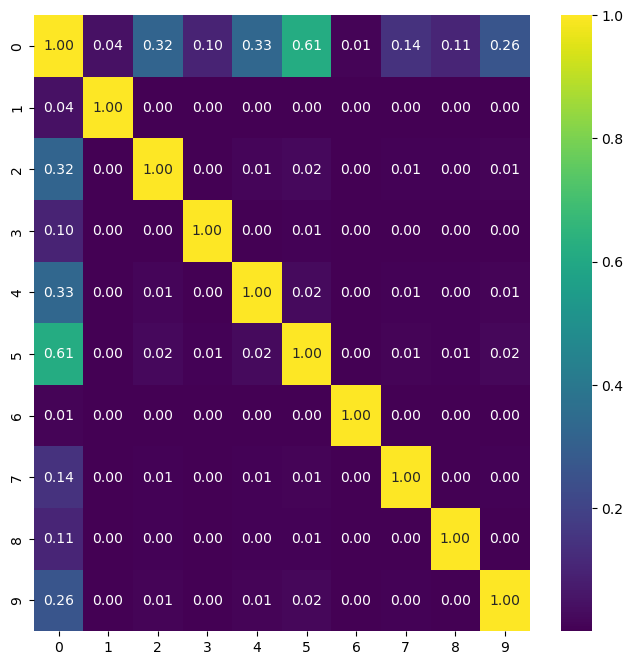

In [38]:
# Utilizzo una SVD invece di PCA dato che i dati sono sparsi lungo intervalli diversi!

# Inizzializzo la instanza
svd_prova = TruncatedSVD(n_components=10)

# Faccio il fit alle componenti
svd_prova.fit(X1_resampled)

# Transformo le features
X1_resampled_transformed_prova = svd_prova.transform(X1_resampled)

print(f"Il numero di instances nel nuovo dataset rimane invariato ({X1_resampled_transformed_prova.shape[0]}), mentre ora ho soltanto {X1_resampled_transformed_prova.shape[1]} features")


# calcolare la correlation matrix
corr2 = np.abs(pd.DataFrame(X1_resampled_transformed_prova).corr())

# visualizzare i risultati
plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, fmt=".2f", cmap='viridis')
plt.show()



le nuove features seguono una distribuzione molto diversa!!!
se genero i sample macanti seguendo con un numero elevato di k_neighbors allora la distribuzione diventa più Gaussiana!


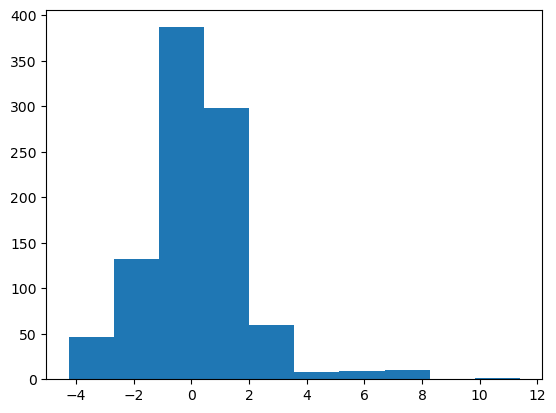

In [39]:
plt.hist(pd.DataFrame(X1_resampled_transformed_prova[:,9]))
print("le nuove features seguono una distribuzione molto diversa!!!")
print("se genero i sample macanti seguendo con un numero elevato di k_neighbors allora la distribuzione diventa più Gaussiana!")

### Divisione train/test

In [70]:
# Divido il campione in training/test
X1_pretrain, X1_pretest, y_pretrain, y_pretest = train_test_split(X1_resampled, y_resampled, test_size=0.2, random_state=42)
X1_train, X1_test, y_train, y_test             = train_test_split(X[mask_target1], y[mask_target1], test_size=0.2, random_state=42)


### Hyperparameter tunning

In [41]:
# Creare gli steps di una pipeline per studiare lo spazio dei parametri del modello
steps = [("svd", TruncatedSVD()), 
         ("scaler", StandardScaler()), 
         ("model", xgb.XGBClassifier())]

# Creare la pipeline
pipeline = Pipeline(steps)

# Scegliere degli intervalli larghi per una random search che mi dia idea dell'ordine di grandezza verso dove si muovono i parametri
param_interv = {
    'svd__n_components': np.arange(10,14,1),           # Numero di componenti in cui voglio analizzare 
    'model__eta': np.arange(0,1,0.05),                 # Learning rate. Step size shrinkage used in update to prevents overfitting
    'model__gamma': np.arange(0,5,0.1),                # Lagrangian multiplier. Minimum loss reduction required to make a further partition on a leaf node of the tree 
    'model__max_depth': np.arange(2,4,1),              # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
    'model__reg_alpha': np.arange(0,0.5,0.1),            # L1 regularization term on weights
    'model__reg_lambda': np.arange(0.5,1,0.1),           # L2 regularization term on weights
    'model__min_child_weight': np.arange(0,3,0.2),     # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': np.arange(0.5,0.9,0.1)         # Subsample ratio of the training instances
}

# Qua faccio un tentativo con un Genetic Algorithm per ottimizzare gli hyperparams del XGBoost
param_grid2 = {
    'svd__n_components': Integer(10,14),           # Numero di componenti in cui voglio analizzare 
    'model__eta': Continuous(0,3),                 # Learning rate. Step size shrinkage used in update to prevents overfitting
    'model__gamma': Continuous(0,5),                # Minimum loss reduction required to make a further partition on a leaf node of the tree 
    'model__max_depth': Integer(3,5),              # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
    'model__reg_alpha': Continuous(0,1),            # L1 regularization term on weights
    'model__reg_lambda': Continuous(0,1),           # L2 regularization term on weights
    'model__min_child_weight': Continuous(0.5,3),     # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': Continuous(0.6,0.9)          # Subsample ratio of the training instances   
}

# Creare il KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [42]:
# Cercare i parametri giusti con una random search CV
rand_grid1 = RandomizedSearchCV(pipeline, param_distributions=param_interv, scoring='roc_auc', cv=kf, n_iter=30)
rand_grid1.fit(X1_pretrain, y_pretrain)

# print best params of the grid
print(f"Random grid best params: {rand_grid1.best_params_}")
print(f"Grid Roc Auc: {rand_grid1.score(X1_pretest,y_pretest)}")

Random grid best params: {'svd__n_components': 12, 'model__subsample': 0.5, 'model__reg_lambda': 0.5, 'model__reg_alpha': 0.30000000000000004, 'model__min_child_weight': 1.2000000000000002, 'model__max_depth': 3, 'model__gamma': 1.1, 'model__eta': 0.1}
Grid Roc Auc: 0.9806928508384818


In [87]:
### ATTENZIONE: TIME CONSUMING!!!
# The main class from sklearn-genetic-opt
evolved_estimator1 = GASearchCV(estimator=pipeline,cv=kf,scoring='roc_auc',
                               param_grid=param_grid2,n_jobs=-1,verbose=False)

evolved_estimator1.fit(X1_pretrain, y_pretrain)

# print best params of the grid
print(f"Best params: {evolved_estimator1.best_params_}")
print(f"Grid Roc Auc: {evolved_estimator1.score(X1_pretest,y_pretest)}")

Best params: {'svd__n_components': 12, 'model__eta': 0.245392286623213, 'model__gamma': 1.2803391679957126, 'model__max_depth': 5, 'model__reg_alpha': 0.0662291310376365, 'model__reg_lambda': 0.25140616685185735, 'model__min_child_weight': 0.6415871618811154, 'model__subsample': 0.8271292467413545}
Grid Roc Auc: 0.9802515445719329


In [90]:
# Ora passo i valori del test set iniziale al modello ottenuto dalla griglia

# Random searchCV
#y_pred = rand_grid1.predict(X1_test)

# Genetic Algorithm
y_pred = evolved_estimator1.predict(X1_test)


Precision: 0.8636363636363636
Recall: 1.0
F1 score: 0.9268292682926829
ROC AUC: 0.984375


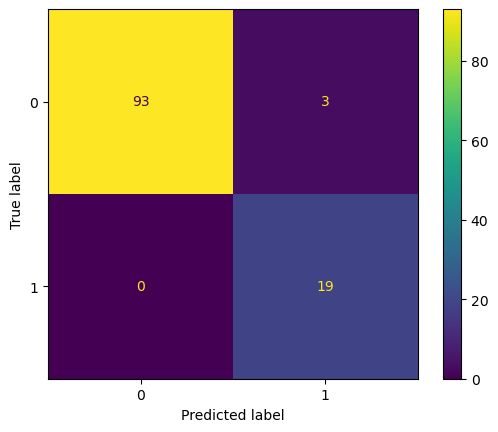

In [91]:
# Calcolare la precision
precision = precision_score(y_test, y_pred)

# Calcolare recall
recall = recall_score(y_test, y_pred)

# Calcolare F1 score
f1 = f1_score(y_test, y_pred)

# calcolare il punteggio roc_auc
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'ROC AUC: {roc_auc}')

"""
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()"""

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

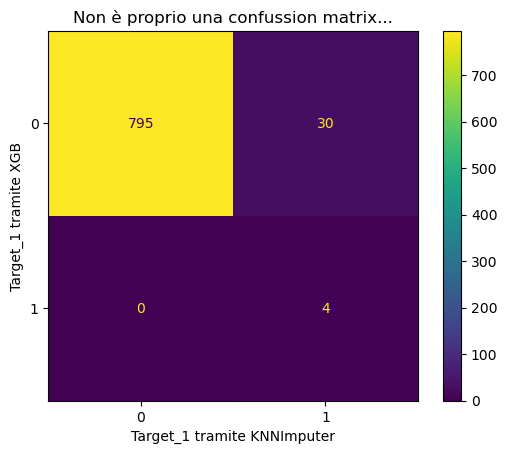

In [79]:
# Bonus: confrontare i label ottenuti col XGBoost con quelli 'indovinati' all'inizio...

# utilizzo il modello allenato prima per ottenere i dati mancanti
y_pred_missing = evolved_estimator1.predict(X[~mask_target1])

disp_missing = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred_missing,df_Target_1B['Target_1'][~mask_target1]))
disp_missing.plot()
plt.title('Non è una vera confussion matrix...')
plt.xlabel('Target_1 tramite KNNImputer')
plt.ylabel('Target_1 tramite XGB')
plt.show()


<font color=blue> Quindi il guess iniziale non è stato cosi accurato!!

# Target_2

In [48]:
# Ora voglio vedere Target_2
z = df['Target_2']

# Aumento la quantità di samples di classe "1" per bilanciare le classi di output (anche questo è 'discutibile, ma lo faccio qua)
X2_resampled, z_resampled = SMOTE(random_state=42,k_neighbors=3).fit_resample(X, z)

print(f"Numero di instances appartenenti a classe 1 prima del SMOTE re-sampling: {z.sum()}")
print(f"Numero di instances appartenenti a classe 1 dopo del SMOTE re-sampling: {z_resampled.sum()}")


Numero di instances appartenenti a classe 1 prima del SMOTE re-sampling: 17.0
Numero di instances appartenenti a classe 1 dopo del SMOTE re-sampling: 1383.0


In [80]:
# Divido il campione in training/test
X2_pretrain, X2_pretest, z_pretrain, z_pretest = train_test_split(X2_resampled, z_resampled, test_size=0.2, random_state=42)
X2_train, X2_test, z_train, z_test             = train_test_split(X, z, test_size=0.2, random_state=42)


In [50]:
# Cercare i parametri giusti con una random search CV
rand_grid2 = RandomizedSearchCV(pipeline, param_distributions=param_interv, scoring='roc_auc', cv=kf,n_iter=30)
rand_grid2.fit(X2_pretrain, z_pretrain)

# print best params of the grid
print(f"Grid best params: {rand_grid2.best_params_}")
print(f"Grid Roc Auc: {rand_grid2.score(X2_pretest,z_pretest)}")


Grid best params: {'svd__n_components': 13, 'model__subsample': 0.6, 'model__reg_lambda': 0.7, 'model__reg_alpha': 0.0, 'model__min_child_weight': 0.8, 'model__max_depth': 3, 'model__gamma': 1.6, 'model__eta': 0.1}
Grid Roc Auc: 1.0


In [51]:
### ATTENZIONE: TIME CONSUMING!!!
# The main class from sklearn-genetic-opt
evolved_estimator2 = GASearchCV(estimator=pipeline,cv=kf,scoring='roc_auc',
                               param_grid=param_grid2,n_jobs=-1,verbose=False)

evolved_estimator2.fit(X2_pretrain, z_pretrain)

# print best params of the grid
print(f"Best params: {evolved_estimator2.best_params_}")
print(f"Grid Roc Auc: {evolved_estimator2.score(X2_pretest,z_pretest)}")

Best params: {'svd__n_components': 14, 'model__eta': 0.2035958188260455, 'model__gamma': 0.861602822247371, 'model__max_depth': 3, 'model__reg_alpha': 0.001104304961342728, 'model__reg_lambda': 0.011564700361495261, 'model__min_child_weight': 0.9513011008353964, 'model__subsample': 0.6978916676100485}
Grid Roc Auc: 1.0


In [85]:
# Ora passo i valori del test set iniziale al modello ottenuto dalla griglia

# Random searchCV
#z_pred = rand_grid2.predict(X2_test)

# Genetic Algorithm
z_pred = evolved_estimator2.predict(X2_test)

Precision: 0.75
Recall: 1.0
F1 score: 0.8571428571428571
ROC AUC: 0.9981949458483754


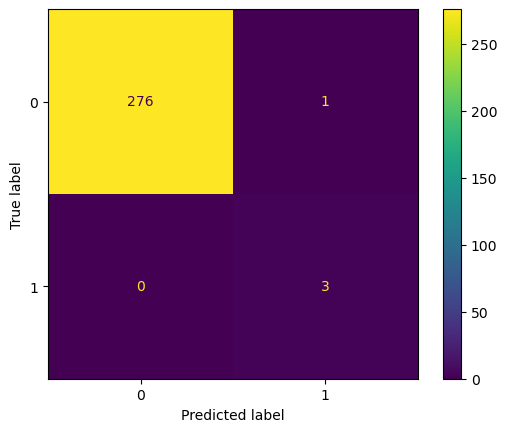

In [86]:
# Calcolare la precision
precision = precision_score(z_test, z_pred)

# Calcolare recall
recall = recall_score(z_test, z_pred)

# Calcolare F1 score
f1 = f1_score(z_test, z_pred)

# calcolare il punteggio roc_auc
roc_auc = roc_auc_score(z_test, z_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'ROC AUC: {roc_auc}')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(z_test, z_pred))
disp.plot()
plt.show()

<font color=blue> Potrei aggiungere un confronto della performance delle due griglie (RandomSearchCV - GeneticAlgorithm) in funzione del tempo necessario per allenare i rispettivi modelli: a intuito posso dire che RandomSearchCV impiega circa 1 min e raggiunge una ROC_AUC di 0.96 e 0.99 per Target_1 e Target_2, mentre GeneticAlgorithm impiega circa 8 min e raggiunge una ROC_AUC di 0.98 e 0.99 per Target_1 e target_2
    
<font color=blue> I migliori modelli quindi sono stati trovati con GeneticAlgoritm sia per Target_1 che per Target_2

In [122]:
x = np.zeros((128,128,3))

r = 256
b = 128
x[:,:,0] = r
x[:,:,2] = b

zz = x[:,:,0].copy()
yy = x[:,:,2].copy()

x[:,:,0] = yy
x[:,:,2] = zz